# Prediction of Airbnb listings prices in neighbourhoods of Barcelona, Spain

### URBAN5123 - Programming Tools for Urban Analytics

#### 2659993

#### 30.03.2024

### 1. Introduction

Short-term rental services and their impacts on cities' dynamics have been object of study of many urban researchers and policy makers. The increasing number of private tourist accommodations has relevant implications for tourist neighbourhoods in cities worldwide. One of them is the "collective displacement" (Gant, 2016) of long-term residents or tourism gentrification, caused by the rise of the costs of living.

Airbnb has a leading position in the short-term rental marketplace. The company's business model fills a gap "[...] between traditional residential rental housing and hotel accommodation" (Wachsmuth and Weisler, 2018, p.1149), with its success linked to the development of what became known as the sharing economy.

The academic literature explores the impacts of Airbnb listings in different urban centres. Wachsmuth and Weisler (2018) argue that Airbnb has induced a new form of rent gap in neighbourhoods of New York City, whilst Álvarez-Herranz and Macedo-Ruíz (2021) developed a model that correlates the number of Airbnb accommodations in Madrid's neighbourhoods to urban sustainability indicators. Valente et al. (2023) evaluated the effects of tourism growth on residential stability in Amsterdam and Barcelona. Authors used Airbnb listings in both cities to calculate a measure of pressure on the available housing stock over a three-year period, testing the hypothesis that this measure is correlated "[...] with the average duration of residence in Amsterdam, and with the percentage of long-term residents in Barcelona [...]" (Valente et al., 2023, p.1).

This analysis aims to develop a prediction model to estimate Airbnb listings prices per night in the context of Barcelona based on historical data ranging from 2015 to 2019. Other studies often take into account property characteristics and rating scores as independent variables. Here measurements typically related to displacement and neighbourhood change phenomena are also included, such as the Gini index and percentage of foreigners living in each neighbourhood. The objective is to assess whether these factors influence price.

### 2. Data

The data for this analysis is from Kaggle's dataset "Barcelona's Change & Displacement Indicators" (https://www.kaggle.com/datasets/macmotx/barcelona-data-airbnb-listings-10-years), which was created using Inside Airbnb data along with public data from the City Council's Municipal Data Office. Two csv files are used: *airbnb_dataset* and *bcn_dataset2015_2019*. The first file contains selected features from Airbnb listings in the city ranging from 2009 to 2022 whilst the second file contains social, economic and housing attributes extracted from public data from 2015 to 2019.

In [27]:
# Import packages to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [28]:
# Read the datasets

airbnb_df = pd.read_csv("Data/airbnb_dataset.csv")
bcn_df = pd.read_csv("Data/bcn_dataset2015_2019.csv")
bcn_boundaries = gpd.read_file('Data/0301040100_Barris_ADM_ETRS89.shp') # Neighbourhoods boundaries

In [29]:
# First rows of the dataset

airbnb_df.head()

Unnamed: 0 neighbourhood_group_cleansed neighbourhood_cleansed        id  \
0           0                 Ciutat Vella               el Raval   1822149   
1           1                 Ciutat Vella               el Raval   6290341   
2           2                 Ciutat Vella               el Raval  11629529   
3           3                 Ciutat Vella               el Raval   3845305   
4           4                 Ciutat Vella               el Raval  11312258   

  property_type        room_type  beds license  price  number_of_reviews  \
0     Apartment     Private room   1.0     NaN   36.0                 50   
1     Apartment  Entire home/apt   3.0     NaN   69.0                 62   
2     Apartment  Entire home/apt   2.0     NaN   79.0                 16   
3     Apartment     Private room   1.0     NaN   65.0                  0   
4     Apartment  Entire home/apt   2.0     NaN  125.0                  7   

   reviews_per_month first_review last_review  review_scores_location  \
0               2.04   2015-04-05  2016-12-12                    10.0   
1               2.66   2015-05-12  2017-03-19                     9.0   
2               1.29   2016-04-01  2017-03-27                     9.0   
3                NaN          NaN         NaN                     NaN   
4               1.06   2016-09-22  2017-04-07                    10.0   

   review_scores_communication   host_id  host_since  host_listings_count  
0                          9.0   9539548  2013-10-20                  3.0  
1                          9.0   1853675  2012-03-04                 14.0  
2                         10.0  61619668  2016-03-05                  1.0  
3                          NaN  19821352  2014-08-11                  1.0  
4                         10.0  55366754  2016-01-20                  8.0

In [30]:
bcn_df.head()

Unnamed: 0  year     neighbourhood  population  % spaniards  % strangers  \
0           0  2015     Baró de Viver      2482.0         89.7         10.3   
1           1  2015          Can Baró      8938.0         86.9         13.1   
2           2  2015       Can Peguera      2267.0         92.9          7.1   
3           3  2015         Canyelles      6946.0         95.9          4.1   
4           4  2015  Ciutat Meridiana     10156.0         72.2         27.8   

   % w/ higher education  unemployed  total_surface(m2)  housing(m2)  ...  \
0                    5.7       150.0             110971        80219  ...   
1                   24.2       442.0             413313       318343  ...   
2                    7.0       141.0              69811        56595  ...   
3                   10.4       554.0             309727       240025  ...   
4                    5.7      1146.0             271520       228636  ...   

   disp_income(€/year)     year_mean     RFD100  gini_index(%)  \
0              11217.0  18997.739726  59.043866      33.450000   
1              18883.0  18997.739726  99.396035      32.800000   
2              12002.0  18997.739726  63.175937      34.450000   
3              17003.0  18997.739726  89.500121      26.140000   
4              10203.0  18997.739726  53.706389      34.566667   

   new_household_purchases  protected_household_purchases  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3                      0.0                            0.0   
4                      0.0                            0.0   

   used_household_purchases  new_household_purchases(x1000€)  \
0                       8.0                              NaN   
1                      59.0                              NaN   
2                       5.0                              NaN   
3                      31.0                              NaN   
4                      68.0                              NaN   

   Used_household_purchases(x1000€)  Total_household_purchases(x1000€)  
0                             261.8                              261.8  
1                             129.1                              129.1  
2                              80.5                               80.5  
3                             123.6                              123.6  
4                              60.2                               60.2  

[5 rows x 38 columns]

In [31]:
# Shape of dataframes
print(f"Shape of airbnb_df: {airbnb_df.shape}")
print(f"Shape of bcn_df: {bcn_df.shape}")

Shape of airbnb_df: (82031, 18)
Shape of bcn_df: (365, 38)


In [32]:
# Drop the unnamed column and print shape again
airbnb_df.drop("Unnamed: 0", axis = 1, inplace = True)
bcn_df.drop("Unnamed: 0", axis = 1, inplace = True)

print(f"Shape of airbnb_df after dropping unnamed column: {airbnb_df.shape}")
print(f"Shape of bcn_df after dropping unnamed column: {bcn_df.shape}")

Shape of airbnb_df after dropping unnamed column: (82031, 17)
Shape of bcn_df after dropping unnamed column: (365, 37)


In [33]:
# Drop duplicates from airbnb_df
airbnb_df.drop_duplicates(inplace=True)

print(f"Shape of airbnb_df after dropping duplicates: {airbnb_df.shape}")

Shape of airbnb_df after dropping duplicates: (74569, 17)


In [34]:
bcn_df.columns

Index(['year', 'neighbourhood', 'population', '% spaniards', '% strangers',
       '% w/ higher education', 'unemployed', 'total_surface(m2)',
       'housing(m2)', 'parking(m2)', 'commerce(m2)', 'industry(m2)',
       'offices(m2)', 'education(m2)', 'healthcare(m2)', 'hostelry(m2)',
       'sports(m2)', 'religious(m2)', 'entertainment(m2)', 'other_uses(m2)',
       'avg_€/month', 'avg_€/m2', 'avg_housing(m2)', 'new_contracts_1000_hab',
       'expired_contracts_1000_hab', 'win_lost_rents_1000_hab',
       'binary_rent_growth_1000_hab', 'disp_income(€/year)', 'year_mean',
       'RFD100', 'gini_index(%)', 'new_household_purchases',
       'protected_household_purchases', 'used_household_purchases',
       'new_household_purchases(x1000€)', 'Used_household_purchases(x1000€)',
       'Total_household_purchases(x1000€)'],
      dtype='object')

In [35]:
airbnb_df.columns

Index(['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'id',
       'property_type', 'room_type', 'beds', 'license', 'price',
       'number_of_reviews', 'reviews_per_month', 'first_review', 'last_review',
       'review_scores_location', 'review_scores_communication', 'host_id',
       'host_since', 'host_listings_count'],
      dtype='object')

The period of analysis will be 2015 to 2019 to align with the limits of the public dataset, and the variable *host_since* is used as a proxy to filter the Airbnb dataset. It is assumed that listings which started hosting between 2015 and 2019 indicate listings were scraped during that timeframe.

In [36]:
# Select only listings from 2015 to 2019

# Ensure host_since is datetime format
airbnb_df["host_since"] = pd.to_datetime(airbnb_df["host_since"])

start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2019-12-31')

airbnb_df2015_to2019 = airbnb_df[(airbnb_df['host_since'] >= start_date) & (airbnb_df['host_since'] <= end_date)]

# Show first five observations sorting values in date ascending order
#airbnb_df2015_to2019.sort_values("host_since").head()

# Show last five observations sorting values in date ascending order
#airbnb_df2015_to2019.sort_values("host_since").tail()

len(airbnb_df2015_to2019)

36818

In [37]:
# Adding a column "year" to the dataframe from host_since

airbnb_df2015_to2019['year'] = airbnb_df2015_to2019['host_since'].dt.year
airbnb_df2015_to2019.head()

# Convert "year" from datetime to numeric

airbnb_df2015_to2019["year"] = pd.to_numeric(airbnb_df2015_to2019["year"])
airbnb_df2015_to2019["year"].describe

<bound method NDFrame.describe of 2        2016
4        2016
8        2015
10       2016
11       2017
         ... 
82024    2019
82025    2018
82026    2017
82029    2018
82030    2018
Name: year, Length: 36818, dtype: int32>

The previous research is taken into consideration (Deboosere et al., 2019; Garcia-López et al., 2020; Thackway et al., 2022; Valente et al., 2023; Wachsmuth and Weisler, 2018) to decide which features to drop from the study and which to maintain.

Common variables included in these studies are room type, count of listings per neighbourhood, resident population, average rent per month or square meters, percentage of foreign population, unemployment rate, among others.

In [38]:
# Create dataframes with relevant variables for analysis

airbnb_subset_df = airbnb_df2015_to2019[["neighbourhood_group_cleansed", "neighbourhood_cleansed", "id", "property_type",
                                         "room_type", "beds", "price","number_of_reviews", "review_scores_location", "host_id",
                                         "year"]]

airbnb_subset_df.head()

bcn_subset_df = bcn_df[["year", "neighbourhood", "population", "% strangers", "% w/ higher education",
                        "unemployed", 'housing(m2)', 'parking(m2)', 'commerce(m2)', 'industry(m2)', 'offices(m2)',
                        'education(m2)', 'healthcare(m2)', 'hostelry(m2)', 'sports(m2)', 'religious(m2)', 'entertainment(m2)',
                        'other_uses(m2)', "avg_€/month", 'avg_€/m2', 'binary_rent_growth_1000_hab', 'disp_income(€/year)',
                        'gini_index(%)', 'Total_household_purchases(x1000€)']]

bcn_subset_df.head()

year     neighbourhood  population  % strangers  % w/ higher education  \
0  2015     Baró de Viver      2482.0         10.3                    5.7   
1  2015          Can Baró      8938.0         13.1                   24.2   
2  2015       Can Peguera      2267.0          7.1                    7.0   
3  2015         Canyelles      6946.0          4.1                   10.4   
4  2015  Ciutat Meridiana     10156.0         27.8                    5.7   

   unemployed  housing(m2)  parking(m2)  commerce(m2)  industry(m2)  ...  \
0       150.0        80219        10269         11414          2004  ...   
1       442.0       318343        30196         22289         25347  ...   
2       141.0        56595         4100          2894           533  ...   
3       554.0       240025        12396          9648         22239  ...   
4      1146.0       228636         2838         10125          6744  ...   

   sports(m2)  religious(m2)  entertainment(m2)  other_uses(m2)  avg_€/month  \
0         0.0            224                0.0             307     284.5800   
1      1112.0              0                0.0              54     549.2775   
2         0.0            374                0.0               0          NaN   
3      6561.0            105                0.0             229     577.2900   
4      1232.0            992                0.0               0     395.4125   

   avg_€/m2  binary_rent_growth_1000_hab  disp_income(€/year)  gini_index(%)  \
0  4.886667                          0.0              11217.0      33.450000   
1  9.832500                          0.0              18883.0      32.800000   
2       NaN                          0.0              12002.0      34.450000   
3  7.356667                          0.0              17003.0      26.140000   
4  6.487500                          1.0              10203.0      34.566667   

   Total_household_purchases(x1000€)  
0                              261.8  
1                              129.1  
2                               80.5  
3                              123.6  
4                               60.2  

[5 rows x 24 columns]

The dataset does not have a variable accounting for the number of listings per neighbourhood in each year. The following steps are to calculate and add this variable to *bcn_subset_df*.

In [39]:
# Checking if neighbourhood names are the same in both dataframes

# Rename neighbourhood_cleansed to neighbourhood and neighbourhood_group_cleansed to district in airbnb_subset_df
airbnb_subset_df = airbnb_subset_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'neighbourhood_group_cleansed':
                                                   'district'})

# Convert neighbourhood to lowercase for case-insensitive comparison
bcn_subset_df['neighbourhood'] = bcn_subset_df['neighbourhood'].str.lower()
airbnb_subset_df['neighbourhood'] = airbnb_subset_df['neighbourhood'].str.lower()

# Find all unique neighbourhoods in airbnb_subset_df and bcn_subset_df
all_airbnb_neighbourhoods = airbnb_subset_df['neighbourhood'].unique()
all_bcn_neighbourhoods = bcn_subset_df["neighbourhood"].unique()

# Find neighbourhoods in airbnb_subset_df that are not in bcn_subset_df
additional_neighbourhoods = set(all_airbnb_neighbourhoods) - set(bcn_subset_df['neighbourhood'])

# Print the additional neighbourhoods
print("Neighbourhoods in airbnb_subset_df not present in bcn_subset_df:")
for neighbourhood in additional_neighbourhoods:
  print(neighbourhood)

# Find neighbourhoods in bcn_subset_df that are not in airbnb_subset_df
other_neighbourhoods = set(all_bcn_neighbourhoods) - set(airbnb_subset_df["neighbourhood"])

# Print the other neighbourhoods
print("\nNeighbourhoods in bcn_subset_df not present in airbnb_subset_df:")
for neighbourhood in other_neighbourhoods:
  print(neighbourhood)

Neighbourhoods in airbnb_subset_df not present in bcn_subset_df:
sant pere, santa caterina i la ribera
ciudad universitaria
el poble sec
vallvidrera, el tibidabo i les planes

Neighbourhoods in bcn_subset_df not present in airbnb_subset_df:
vallvidrera el tibidabo i les planes
sant pere santa caterina i la ribera
el poble sec - parc montjuïc


In [40]:
print(bcn_subset_df["year"].value_counts())
print(airbnb_subset_df["year"].value_counts())
print(bcn_subset_df["neighbourhood"].value_counts())
print(airbnb_subset_df["neighbourhood"].value_counts())

year
2015    73
2016    73
2017    73
2018    73
2019    73
Name: count, dtype: int64
year
2015    9407
2016    8038
2019    7018
2017    6249
2018    6106
Name: count, dtype: int64
neighbourhood
baró de viver             5
el coll                   5
la font de la guatlla     5
la font d'en fargues      5
la dreta de l'eixample    5
                         ..
vallbona                  5
torre baró                5
sarrià                    5
sants - badal             5
les tres torres           5
Name: count, Length: 73, dtype: int64
neighbourhood
la dreta de l'eixample                   3624
el raval                                 3187
el barri gòtic                           2534
sant pere, santa caterina i la ribera    2194
la sagrada família                       2008
                                         ... 
torre baró                                  4
canyelles                                   4
ciudad universitaria                        1
la clota                      

Barcelona has 73 neighbourhoods, but *airbnb_subset_df* presents 74 categories. Furthermore, there are differences in how 3 neighbourhoods were written between the dataframes that need to be corrected.

The additional neighbourhood in *airbnb_subset_df* is Ciudad Universitaria. This is actually a zone within Les Corts neighbourhood thus it will be modified to match this neighbourhood.

In [41]:
# Copy the DataFrame
airbnb_modified = airbnb_subset_df.copy()

# Modify the neighbourhood in the copy
airbnb_modified.loc[airbnb_modified['neighbourhood'] == "el poble sec", 'neighbourhood'] = "el poble sec - parc montjuïc"
airbnb_modified.loc[airbnb_modified['neighbourhood'] == "sant pere, santa caterina i la ribera", 'neighbourhood'] = "sant pere santa caterina i la ribera"
airbnb_modified.loc[airbnb_modified['neighbourhood'] == "vallvidrera, el tibidabo i les planes", 'neighbourhood'] = "vallvidrera el tibidabo i les planes"
airbnb_modified.loc[airbnb_modified['neighbourhood'] == "ciudad universitaria", 'neighbourhood'] = "les corts"

#airbnb_modified['neighbourhood'].sort_values().unique()

# Group airbnb_modified by year and neighbourhood to count listings
airbnb_count = airbnb_modified.groupby(['year', 'neighbourhood']).size().to_frame(name='airbnb_count')
airbnb_count.reset_index(inplace=True)

# Merge the DataFrames
merged_df = bcn_subset_df.merge(airbnb_count, how='left', on=['year', 'neighbourhood'])

merged_df.head()

year     neighbourhood  population  % strangers  % w/ higher education  \
0  2015     baró de viver      2482.0         10.3                    5.7   
1  2015          can baró      8938.0         13.1                   24.2   
2  2015       can peguera      2267.0          7.1                    7.0   
3  2015         canyelles      6946.0          4.1                   10.4   
4  2015  ciutat meridiana     10156.0         27.8                    5.7   

   unemployed  housing(m2)  parking(m2)  commerce(m2)  industry(m2)  ...  \
0       150.0        80219        10269         11414          2004  ...   
1       442.0       318343        30196         22289         25347  ...   
2       141.0        56595         4100          2894           533  ...   
3       554.0       240025        12396          9648         22239  ...   
4      1146.0       228636         2838         10125          6744  ...   

   religious(m2)  entertainment(m2)  other_uses(m2)  avg_€/month  avg_€/m2  \
0            224                0.0             307     284.5800  4.886667   
1              0                0.0              54     549.2775  9.832500   
2            374                0.0               0          NaN       NaN   
3            105                0.0             229     577.2900  7.356667   
4            992                0.0               0     395.4125  6.487500   

   binary_rent_growth_1000_hab  disp_income(€/year)  gini_index(%)  \
0                          0.0              11217.0      33.450000   
1                          0.0              18883.0      32.800000   
2                          0.0              12002.0      34.450000   
3                          0.0              17003.0      26.140000   
4                          1.0              10203.0      34.566667   

   Total_household_purchases(x1000€)  airbnb_count  
0                              261.8           2.0  
1                              129.1          12.0  
2                               80.5           NaN  
3                              123.6           NaN  
4                               60.2           4.0  

[5 rows x 25 columns]

In [42]:
merged_df["airbnb_count"].isnull().sum()

22

In [43]:
# Replace missing values in airbnb_count with 0
merged_df["airbnb_count"] = merged_df["airbnb_count"].fillna(0)
merged_df["airbnb_count"].isnull().sum()

0

Finally, we join *merged_df* to *airbnb_modified* considering *year* and *neighbourhood* columns.

In [44]:
# Left join to keep all rows from merged_df and duplicate as necessary
final_df = merged_df.set_index(['year', 'neighbourhood']).join(airbnb_modified.set_index(['year', 'neighbourhood']), how='left', sort=False)

# Reset index
final_df = final_df.reset_index()

print(final_df)

       year                  neighbourhood  population  % strangers  \
0      2015                  baró de viver      2482.0         10.3   
1      2015                  baró de viver      2482.0         10.3   
2      2015                       can baró      8938.0         13.1   
3      2015                       can baró      8938.0         13.1   
4      2015                       can baró      8938.0         13.1   
...     ...                            ...         ...          ...   
36835  2019  vilapicina i la torre llobeta     26083.0         16.0   
36836  2019  vilapicina i la torre llobeta     26083.0         16.0   
36837  2019  vilapicina i la torre llobeta     26083.0         16.0   
36838  2019  vilapicina i la torre llobeta     26083.0         16.0   
36839  2019  vilapicina i la torre llobeta     26083.0         16.0   

       % w/ higher education  unemployed  housing(m2)  parking(m2)  \
0                        5.7       150.0        80219        10269   
1      

Now with *final_df* gathering all features, we can have a better understanding of the data through exploratory data analysis (visualisations and summary statistics).

#### 2.1 Data types

In [45]:
final_df.dtypes

year                                   int64
neighbourhood                         object
population                           float64
% strangers                          float64
% w/ higher education                float64
unemployed                           float64
housing(m2)                            int64
parking(m2)                            int64
commerce(m2)                           int64
industry(m2)                           int64
offices(m2)                            int64
education(m2)                          int64
healthcare(m2)                         int64
hostelry(m2)                           int64
sports(m2)                           float64
religious(m2)                          int64
entertainment(m2)                    float64
other_uses(m2)                         int64
avg_€/month                          float64
avg_€/m2                             float64
binary_rent_growth_1000_hab          float64
disp_income(€/year)                  float64
gini_index

Most of the variables are numerical, being either float or integer. The scales for these numbers include percentage, square meters, euros, beds, number of reviews/listings and people. There are also character variables (shown as "object") that specify the neighbourhood, district, property type and room type.

#### 2.2 Summary statistics and visualizations

In [46]:
# Save id and host_id separately in case we need afterwards

final_df_ids = final_df[["id", "host_id"]]

# Drop both from final_df

final_df.drop("id", axis = 1, inplace = True)
final_df.drop("host_id", axis = 1, inplace = True)

# Summary statistics for final_df

final_df.describe()

year    population   % strangers  % w/ higher education  \
count  36840.000000  36840.000000  36840.000000           36840.000000   
mean    2016.817970  35041.282845     26.193909              36.169381   
std        1.461294  13852.924740     13.080188              10.319959   
min     2015.000000      0.000000      4.100000               4.200000   
25%     2015.000000  22923.000000     17.200000              27.700000   
50%     2017.000000  38566.000000     21.500000              37.600000   
75%     2018.000000  46968.000000     31.700000              43.900000   
max     2019.000000  58642.000000     61.900000              54.100000   

         unemployed   housing(m2)   parking(m2)   commerce(m2)  industry(m2)  \
count  36840.000000  3.684000e+04  3.684000e+04   36840.000000  3.684000e+04   
mean    1648.333985  1.540276e+06  2.486267e+05  240441.035722  1.866468e+05   
std      785.536571  7.840916e+05  1.600418e+05  177937.388044  1.441453e+05   
min       16.000000  2.685700e+04  1.918000e+03    2597.000000  5.330000e+02   
25%     1072.000000  9.287040e+05  1.288200e+05  124610.000000  1.155810e+05   
50%     1480.000000  1.407333e+06  2.071850e+05  214978.000000  1.546830e+05   
75%     2032.000000  2.226794e+06  3.345960e+05  245317.000000  2.196280e+05   
max     3901.000000  3.128341e+06  1.426502e+06  759521.000000  2.115099e+06   

        offices(m2)  ...      avg_€/m2  binary_rent_growth_1000_hab  \
count  3.684000e+04  ...  36789.000000                 36840.000000   
mean   2.374361e+05  ...     12.991244                     0.650869   
std    3.020631e+05  ...      1.739821                     0.476702   
min    0.000000e+00  ...      3.515000                     0.000000   
25%    8.034600e+04  ...     11.672500                     0.000000   
50%    1.434630e+05  ...     13.030000                     1.000000   
75%    2.625950e+05  ...     14.100000                     1.000000   
max    1.124680e+06  ...     19.845000                     1.000000   

       disp_income(€/year)  gini_index(%)  Total_household_purchases(x1000€)  \
count         36840.000000   36840.000000                       36831.000000   
mean          20519.039468      35.191351                         318.007885   
std            5544.754825       3.059060                         122.451710   
min           10203.000000      24.380000                          55.300000   
25%           15930.000000      33.106250                         225.500000   
50%           20602.000000      34.802500                         302.600000   
75%           24150.000000      37.534483                         388.000000   
max           42055.000000      43.028571                        1115.900000   

       airbnb_count          beds         price  number_of_reviews  \
count  36840.000000  36121.000000  36798.000000        36818.00000   
mean     348.357546      2.178124    113.984130           26.83910   
std      240.501080      1.670803    609.889783           48.21587   
min        0.000000      0.000000      0.000000            0.00000   
25%      135.000000      1.000000     37.000000            1.00000   
50%      318.000000      2.000000     62.000000            6.00000   
75%      516.000000      3.000000    120.000000           30.00000   
max      890.000000     19.000000  90000.000000          676.00000   

       review_scores_location  
count             28290.00000  
mean                  5.59718  
std                   1.88312  
min                   0.00000  
25%                   4.72000  
50%                   4.92000  
75%                   5.00000  
max                  10.00000  

[8 rows x 28 columns]

In [47]:
# Summary statistics for target variable price
final_df["price"].describe()

count    36798.000000
mean       113.984130
std        609.889783
min          0.000000
25%         37.000000
50%         62.000000
75%        120.000000
max      90000.000000
Name: price, dtype: float64

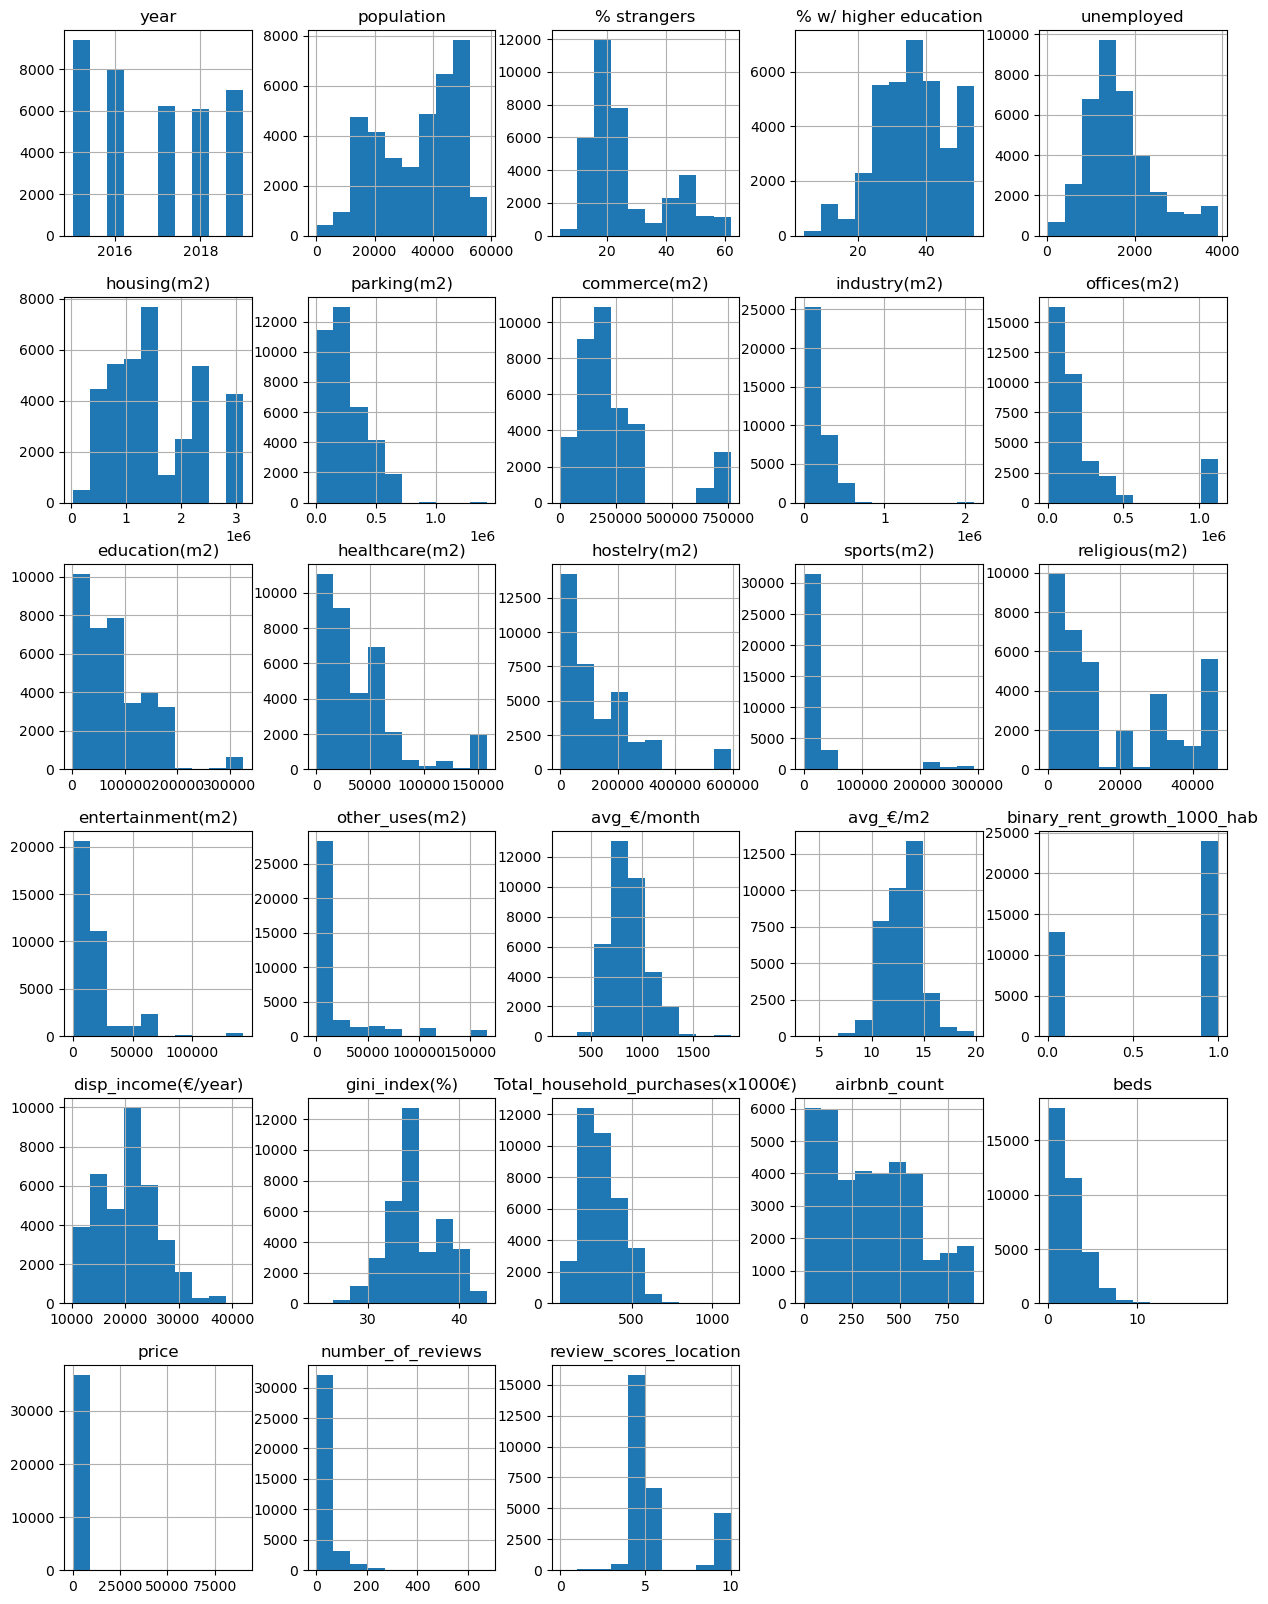

In [48]:
# Distribution of variables
fig, ax = plt.subplots(figsize=(15, 20))
final_df.hist(ax = ax)
plt.show()

Summary statistics for *price* present some unusual values. The minimal price per night is 0, which does not make sense. Moreover, it seems the data contain some outliers - 90,000 euros per night as maximum price is too expensive. These outliers might be causing the distribution to be skewed (as observed in the histogram for *price*). This will be addressed during data cleaning.

The following map shows the distribution of listings per neighbourhood. Geometries for administrative boundaries were obtained from Barcelona's City Council via the Metabolism of Cities Data Hub (https://data.metabolismofcities.org/library/577245/).

In [49]:
# Get NOM and geometry columns from bcn_boundaries
bcn_geom = bcn_boundaries[["NOM", "geometry"]]

# Check for inconsistencies between how neighbourhood names are written in NOM and correct it to match merged_df

# Rename NOM to neighbourhood in bcn_geom
bcn_geom = bcn_geom.rename(columns={'NOM': 'neighbourhood'})

# Convert neighbourhood to lowercase for case-insensitive comparison
bcn_geom['neighbourhood'] = bcn_geom['neighbourhood'].str.lower()

# Find neighbourhoods in bcn_geom that do not match merged_df
bcn_geom_neighbourhoods = set(bcn_geom["neighbourhood"].unique()) - set(merged_df['neighbourhood'])

# Print inconsistencies
#print("Neighbourhoods in bcn_geom not matched with merged_df:")
#for neighbourhood in bcn_geom_neighbourhoods:
  #print(neighbourhood)

# Modify neighbourhoods in bcn_geom
bcn_geom.loc[bcn_geom['neighbourhood'] == "sarriã\xa0", 'neighbourhood'] = "sarrià"
bcn_geom.loc[bcn_geom['neighbourhood'] == "diagonal mar i el front marã­tim del poblenou", 'neighbourhood'] = "diagonal mar i el front marítim del poblenou"
bcn_geom.loc[bcn_geom['neighbourhood'] == "provenã§als del poblenou", 'neighbourhood'] = "provençals del poblenou"
bcn_geom.loc[bcn_geom['neighbourhood'] == "barã³ de viver", 'neighbourhood'] = "baró de viver"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el camp d'en grassot i grã\xa0cia nova", 'neighbourhood'] = "el camp d'en grassot i gràcia nova"
bcn_geom.loc[bcn_geom['neighbourhood'] == "vallvidrera, el tibidabo i les planes", 'neighbourhood'] = "vallvidrera el tibidabo i les planes"
bcn_geom.loc[bcn_geom['neighbourhood'] == "la vila de grã\xa0cia", 'neighbourhood'] = "la vila de gràcia"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el putxet i el farrã³", 'neighbourhood'] = "el putxet i el farró"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el poble-sec", 'neighbourhood'] = "el poble sec - parc montjuïc"
bcn_geom.loc[bcn_geom['neighbourhood'] == "can barã³", 'neighbourhood'] = "can baró"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el baix guinardã³", 'neighbourhood'] = "el baix guinardó"
bcn_geom.loc[bcn_geom['neighbourhood'] == "torre barã³", 'neighbourhood'] = "torre baró"
bcn_geom.loc[bcn_geom['neighbourhood'] == "sant genã\xads dels agudells", 'neighbourhood'] = "sant genís dels agudells"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el barri gã²tic", 'neighbourhood'] = "el barri gòtic"
bcn_geom.loc[bcn_geom['neighbourhood'] == "sant pere, santa caterina i la ribera", 'neighbourhood'] = "sant pere santa caterina i la ribera"
bcn_geom.loc[bcn_geom['neighbourhood'] == "la sagrada famã­lia", 'neighbourhood'] = "la sagrada família"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el besã²s i el maresme", 'neighbourhood'] = "el besòs i el maresme"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el guinardã³", 'neighbourhood'] = "el guinardó"
bcn_geom.loc[bcn_geom['neighbourhood'] == "la vila olã­mpica del poblenou", 'neighbourhood'] = "la vila olímpica del poblenou"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el congrã©s i els indians", 'neighbourhood'] = "el congrés i els indians"
bcn_geom.loc[bcn_geom['neighbourhood'] == "el turã³ de la peira", 'neighbourhood'] = "el turó de la peira"
bcn_geom.loc[bcn_geom['neighbourhood'] == "sant martã­ de provenã§als", 'neighbourhood'] = "sant martí de provençals"


bcn_geom['neighbourhood'].sort_values().unique()

# Join bcn_geom to merged_df
# Left join to keep all rows from merged_df and duplicate as necessary
geom_df = merged_df.set_index(['neighbourhood']).join(bcn_geom.set_index(['neighbourhood']), how='left', sort=False)

# Reset index
geom_df = geom_df.reset_index()

# Create geodataframe
geom_gdf = gpd.GeoDataFrame(geom_df, geometry='geometry')

#geom_gdf.crs
#print(geom_gdf.info())

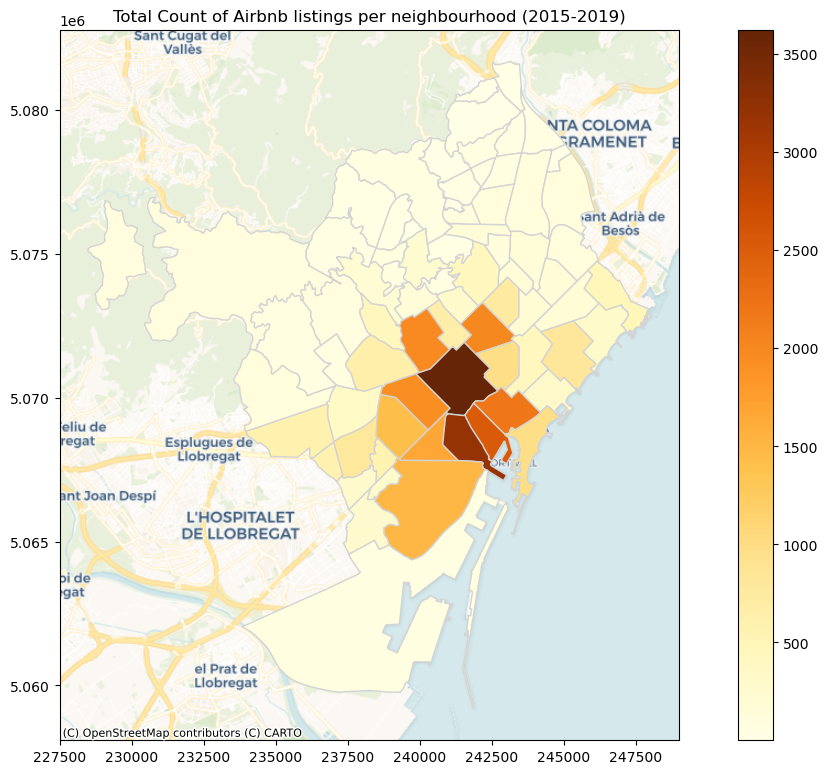

In [50]:
airbnb_count_all = geom_gdf.groupby('geometry')['airbnb_count'].sum().reset_index()
airbnb_count_all_gdf = gpd.GeoDataFrame(airbnb_count_all, geometry='geometry')

# Change projection to align with background mapping
airbnb_count_all_gdf = airbnb_count_all_gdf.to_crs(epsg=3857)

# Plot map
fig, ax = plt.subplots(figsize=(12, 8))
airbnb_count_all_gdf.plot(ax=ax,
    column='airbnb_count',
    legend=True,
    edgecolor='lightgray',
    cmap='YlOrBr',
    vmin=airbnb_count_all_gdf['airbnb_count'].min(),
    vmax=airbnb_count_all_gdf['airbnb_count'].max(),
)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

# Set a title for the overall map
plt.title('Total Count of Airbnb listings per neighbourhood (2015-2019)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The majority of listings is concentrated in the centre part of Barcelona for the period of study, which is similar to findings in other works of the literature (Garcia-López et al., 2020; Valente et al., 2023). This area is also where most of the tourist amenities are located in the city (Garcia-López et al., 2020). The graph below displays the top 10 neighbourhoods by count of Airbnb listings.

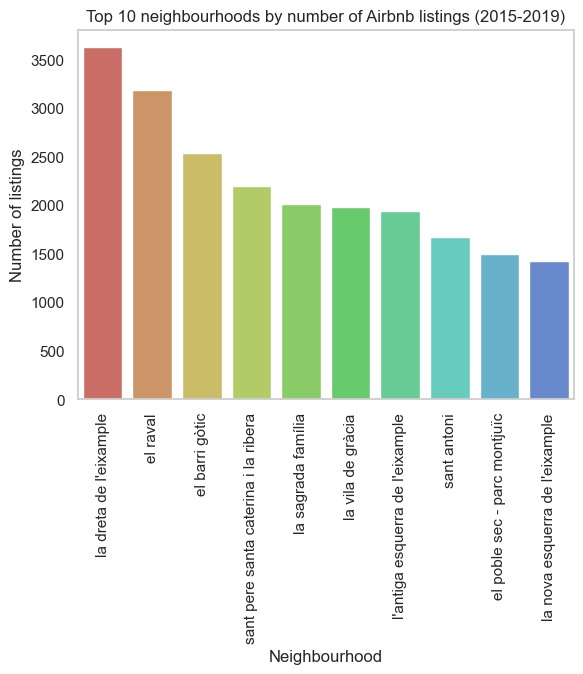

In [51]:
top_10 = geom_df.groupby('neighbourhood')['airbnb_count'].sum().sort_values(ascending=False).head(10)

sns.set()
sns.set_style("whitegrid", {"axes.grid" : False})
sns.barplot(x=top_10.index, y=top_10.values, palette=sns.color_palette("hls", 15))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title and labels
plt.title("Top 10 neighbourhoods by number of Airbnb listings (2015-2019)")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")

# Show the plot
plt.show()

The Gini index is a relative measure of dispersion commonly applied to represent income or wealth inequality within a population. It ranges from 0 (or 0%), representing perfect equality i.e. wealth shared completely equally, to 1 (or 100%) which stands for maximum inequality, i.e. all wealth resides with one person. The dataset contains a variable with the Gini index by neighbourhood per year, represented in percentage numbers. The two maps below show the Gini coefficients in the years 2015 and 2019.

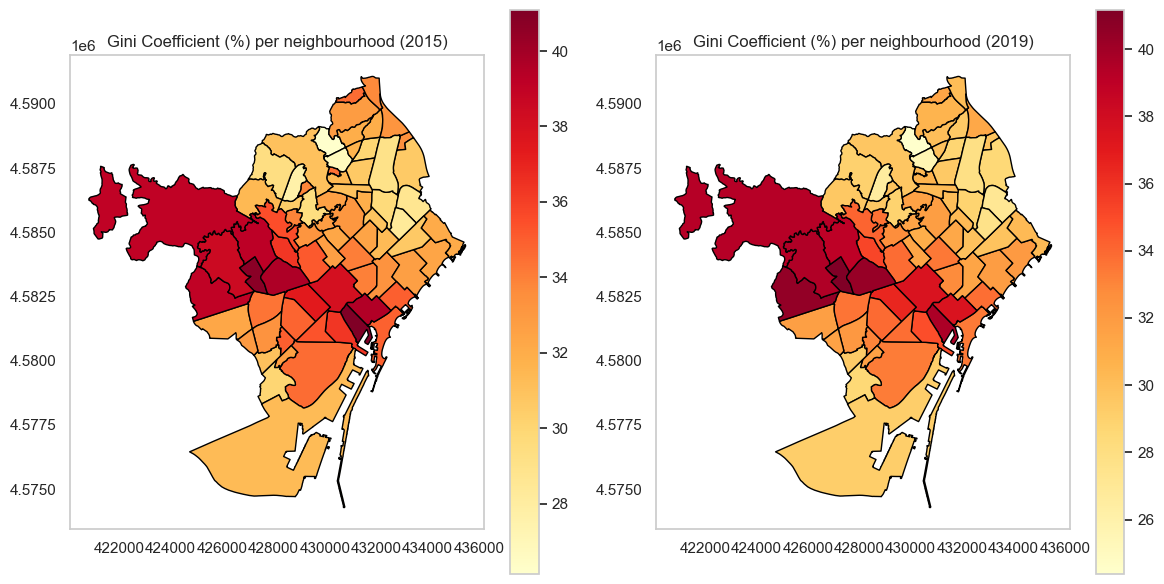

In [52]:
# Filter data for 2015 and 2019
gdf_2015 = geom_gdf[geom_gdf['year'] == 2015]
gdf_2019 = geom_gdf[geom_gdf['year'] == 2019]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Map for 2015
gdf_2015.plot(ax=ax1, column='gini_index(%)', cmap='YlOrRd', legend=True, edgecolor='black')
ax1.set_title('Gini Coefficient (%) per neighbourhood (2015)')

# Map for 2019
gdf_2019.plot(ax=ax2, column='gini_index(%)', cmap='YlOrRd', legend=True, edgecolor='black')
ax2.set_title('Gini Coefficient (%) per neighbourhood (2019)')

plt.tight_layout()
plt.show()

There is not a significant difference between years in terms of changes in the Gini index. However, it is worth of note that income inequality is higher in neighbourhoods in the northwest of the city and in some areas of the city centre as well (where the number of Airbnb listings is also high, as seen in the previous map).

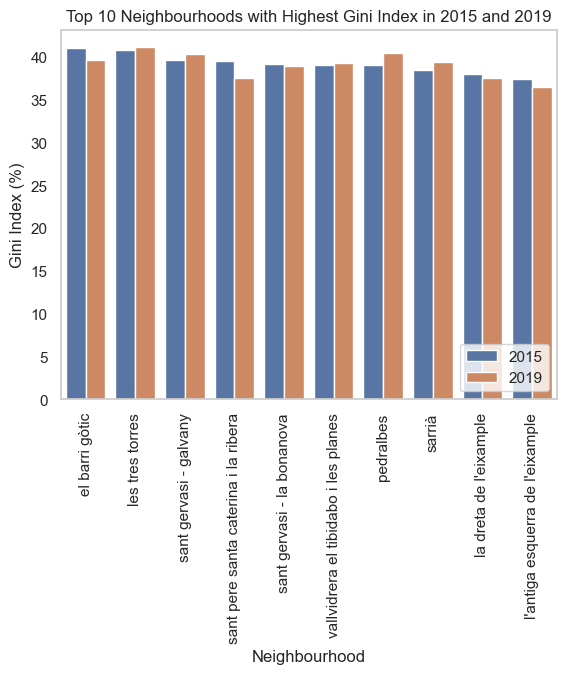

In [53]:
# Filter data for years 2015 and 2019
geom_df_filtered = geom_df[geom_df['year'].isin([2015, 2019])]

# Calculate the top 10 neighbourhoods with highest gini index for each year
top_10_per_year = (
    geom_df_filtered.groupby('year')
    .apply(lambda x: x.nlargest(10, 'gini_index(%)'))
    .reset_index(drop=True)
)

# Create the bar plot with year on the hue facet
sns.barplot(
    x="neighbourhood",
    y="gini_index(%)",
    hue="year",
    data=top_10_per_year,
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Customize the plot with labels and title
plt.xlabel("Neighbourhood")
plt.ylabel("Gini Index (%)")
plt.title("Top 10 Neighbourhoods with Highest Gini Index in 2015 and 2019")
plt.legend(loc="lower right")
plt.show()

Four out of ten neighbourhoods ("La Dreta de L'eixample", "El Barri Gòtic", "Sant Pere, Santa Caterina i la Ribera" and "L'antiga Esquerra de L'eixample") are both in the top 10 on number of Airbnb listings and highest Gini index for 2015 and 2019.

Finally, we explore if the mean proportion of foreigners residents (%) and average monthly rent (€) per square meter for the 2015-2019 period have also high values in the same neighbourhoods where number of listings is considerable higher.

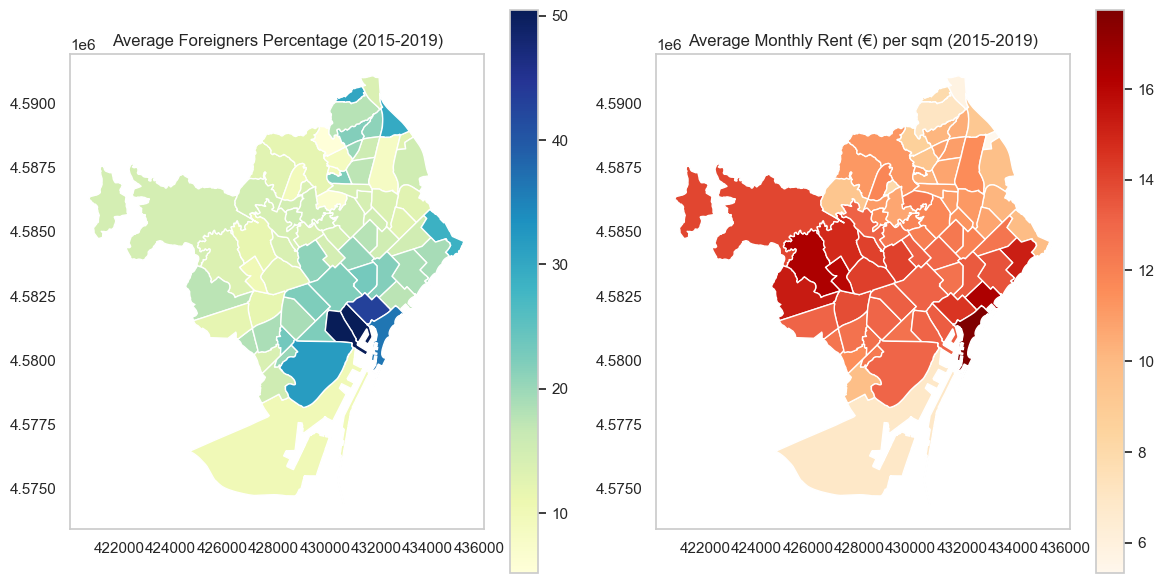

In [54]:
gdf_mean = geom_gdf.groupby('geometry')[['% strangers', 'avg_€/m2']].mean().reset_index()
gdf_mean_gdf = gpd.GeoDataFrame(gdf_mean, geometry='geometry')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first map
ax1.set_title('Average Foreigners Percentage (2015-2019)')
gdf_mean_gdf.plot(column='% strangers', ax=ax1, cmap='YlGnBu', legend=True)

# Plot the second map
ax2.set_title('Average Monthly Rent (€) per sqm (2015-2019)')
gdf_mean_gdf.plot(column='avg_€/m2', ax=ax2, cmap='OrRd', legend=True)

plt.tight_layout()
plt.show()

The mean proportion for the period of analysis of non-Spanish residents in Barcelona shows more foreigners (relatively to the number of Spanish people) tend to live in neighbourhoods where the count of Airbnb properties is also higher. That is, neighbourhoods of the city centre present a higher percentage of foreigners living in them.

Conversely, the average monthly rent per square meter seems to be higher in areas to the northwest of Barcelona (where the Gini index is also higher), although the rent in some neighbourhoods by the coast are also more expensive.

### 3. Data processing and cleaning

As previously, the *price* variable is highly skewed and with potential outliers. First, we plot it against *beds* (which indicates number of beds in the property) to have a better idea of which observations should be removed.

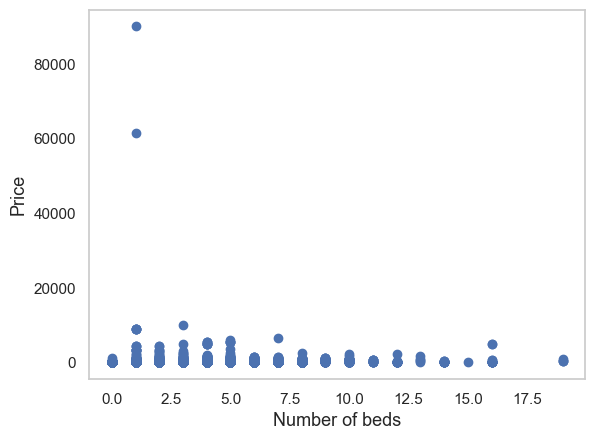

In [55]:
fig, ax = plt.subplots()
ax.scatter(x = final_df['beds'], y = final_df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Number of beds', fontsize=13)
plt.show()

Based on the plot and the summary statistics, we select observations where price is equal or less than 500 euros per night. The upper limit is selected as higher values were still resulting in a standard deviation higher than the mean.

In [56]:
# Select observations with price > 0 and price <= 500
final_df = final_df[(final_df['price'] > 0) & (final_df['price'] <= 500)]

# Print summary statistics again
final_df["price"].describe()

count    36092.000000
mean        91.855508
std         84.879832
min          7.000000
25%         37.000000
50%         60.000000
75%        116.000000
max        500.000000
Name: price, dtype: float64

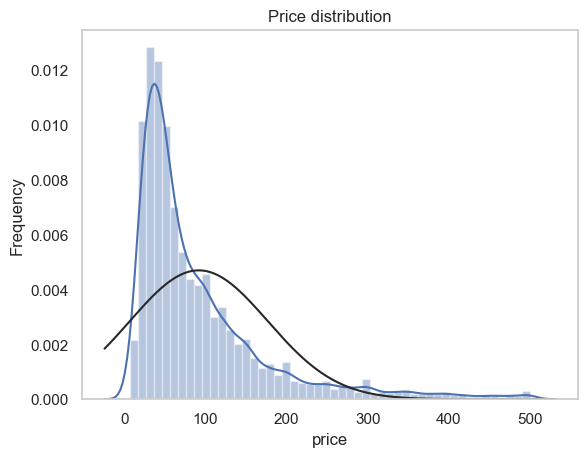

In [57]:
from scipy.stats import norm

sns.distplot(final_df['price'], fit=norm)
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.show()

The distribution still presents a long right tail. A log scale is applied to deal with the skewness and make the distribution more normalised.

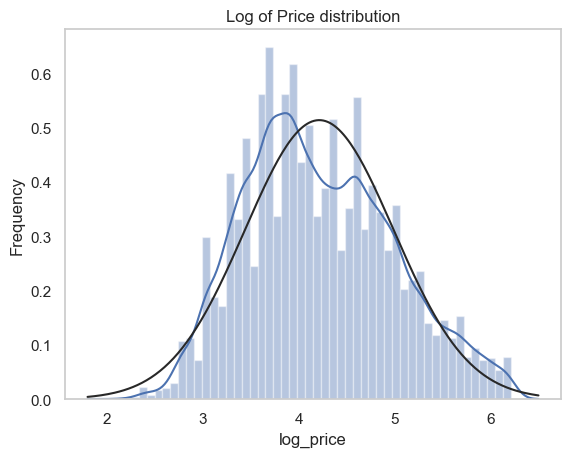

In [58]:
final_df["log_price"] = np.log1p(final_df["price"])

# Check the new distribution 
sns.distplot(final_df["log_price"], fit=norm)

plt.ylabel('Frequency')
plt.title('Log of Price distribution')
plt.show()

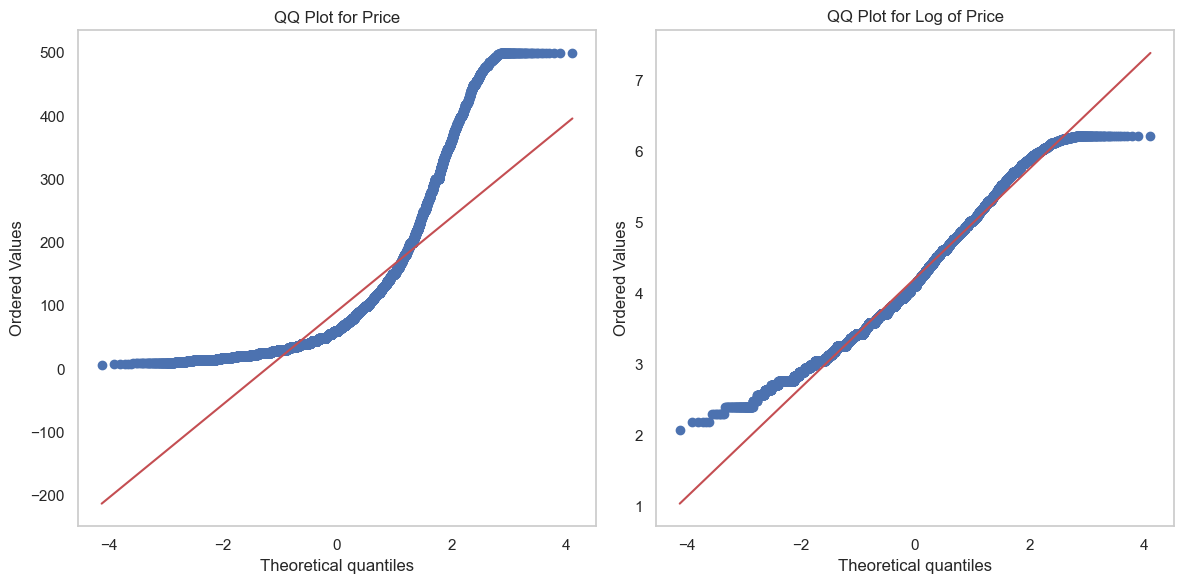

In [59]:
# Plotting also the Q-Q Plot
from scipy import stats

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ plot for 'price'
stats.probplot(final_df['price'], plot=axes[0])
axes[0].set_title('QQ Plot for Price')

# QQ plot for 'log_price'
stats.probplot(final_df['log_price'], plot=axes[1])
axes[1].set_title('QQ Plot for Log of Price')

# Adjust layout
plt.tight_layout()
plt.show()

The distribution and Q-Q plots suggest log-transformed *price* has a more normal distribution than the original *price* variable.

#### 3.1 Missing values

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36092 entries, 0 to 36839
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               36092 non-null  int64  
 1   neighbourhood                      36092 non-null  object 
 2   population                         36092 non-null  float64
 3   % strangers                        36092 non-null  float64
 4   % w/ higher education              36092 non-null  float64
 5   unemployed                         36092 non-null  float64
 6   housing(m2)                        36092 non-null  int64  
 7   parking(m2)                        36092 non-null  int64  
 8   commerce(m2)                       36092 non-null  int64  
 9   industry(m2)                       36092 non-null  int64  
 10  offices(m2)                        36092 non-null  int64  
 11  education(m2)                      36092 non-null  int64  


In [61]:
final_df_na = (final_df.isnull().sum() / len(final_df)) * 100

final_df_na = final_df_na.drop(final_df_na[final_df_na == 0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Ratio': final_df_na})
missing_data.head(10)

Missing Ratio
review_scores_location                 23.068824
beds                                    1.903469
avg_€/month                             0.121911
avg_€/m2                                0.121911
Total_household_purchases(x1000€)       0.024936

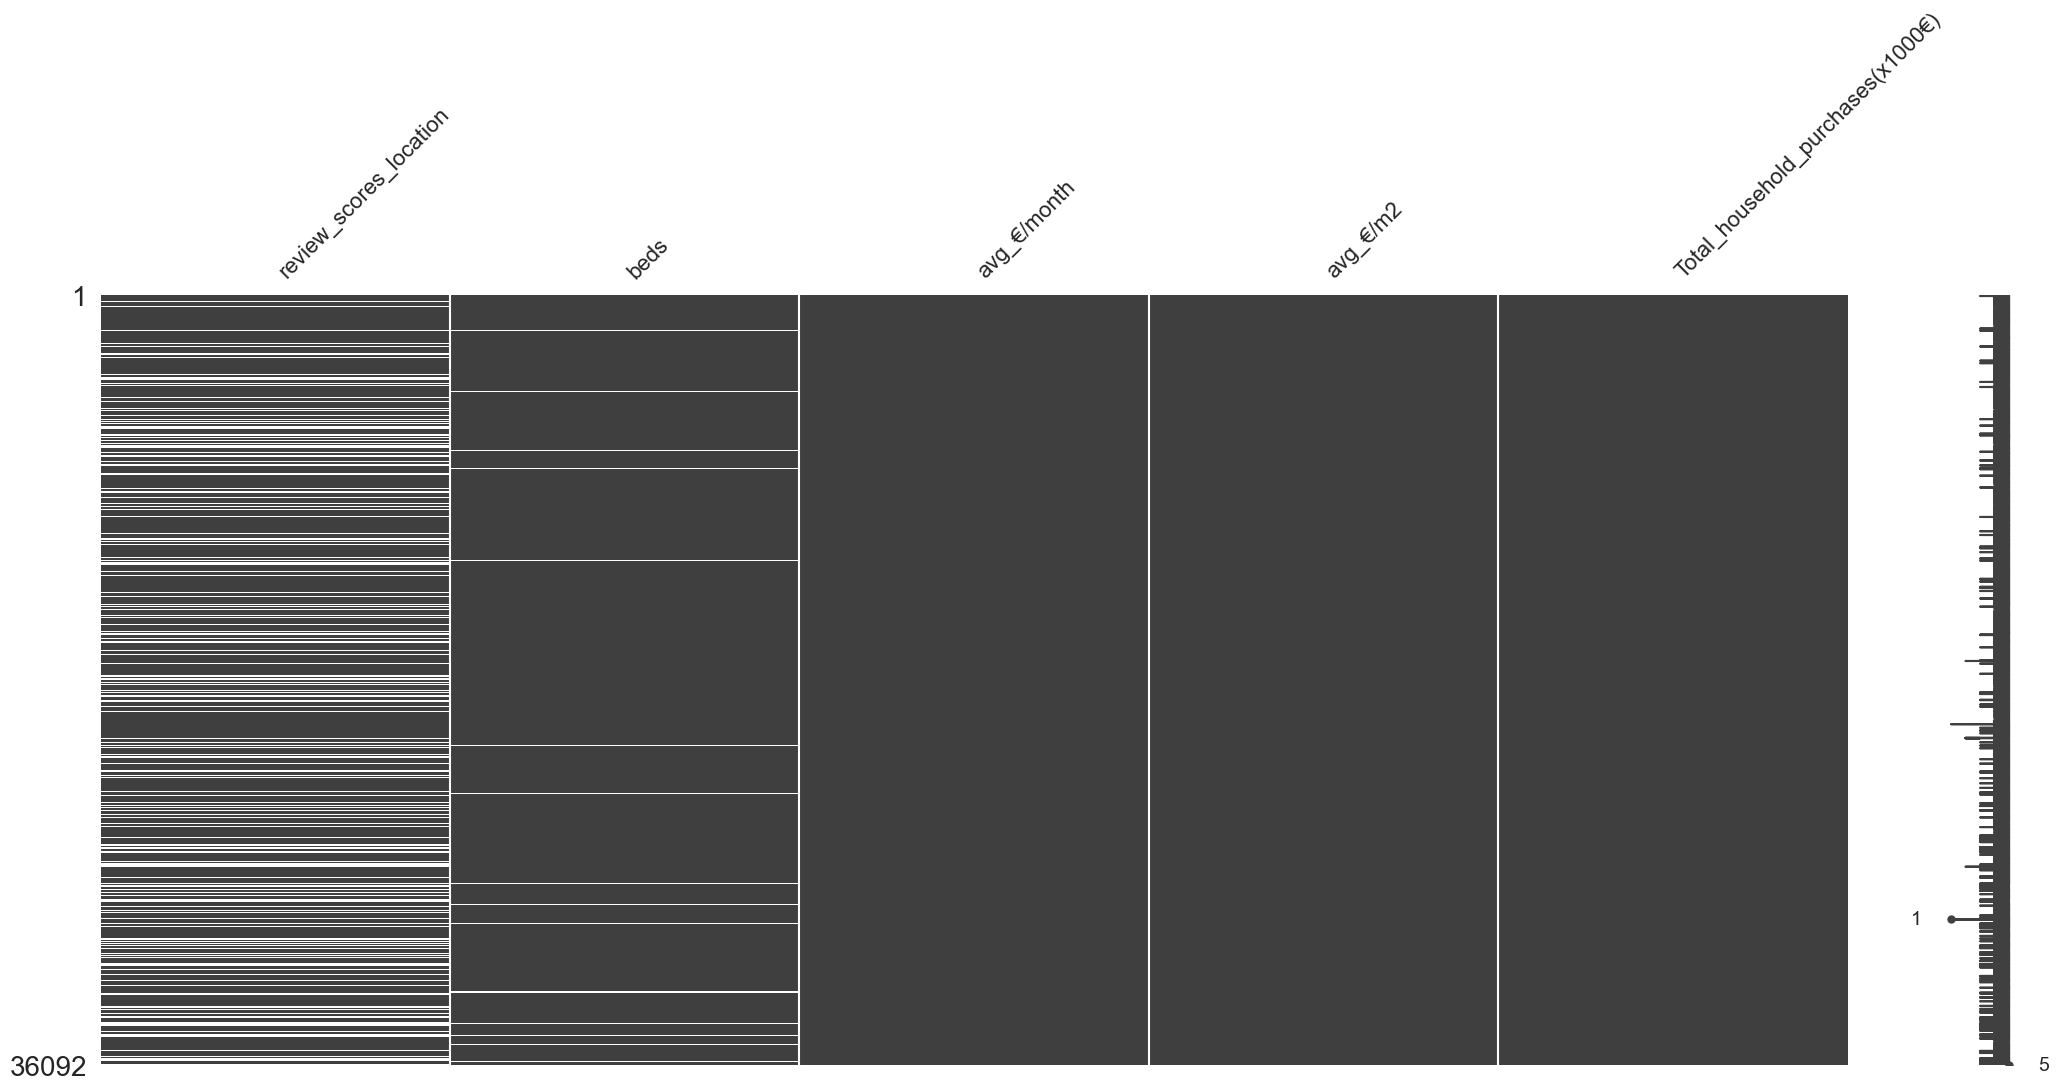

In [62]:
# !pip install missingno
import missingno as msno

msno.matrix(final_df[["review_scores_location", "beds", "avg_€/month", "avg_€/m2", "Total_household_purchases(x1000€)"]])
plt.show()

*review_scores_location* has a considerable ratio of missingness (23%) whereas the other variables have lower levels (2% or less). One could argue the high level of missingness in *review_scores_location* is completely at random, as leaving a score for a listing is optional. Nevertheless, the fact that almost a quarter of observations are missing raises a question on how relevant the variable will be for predicting prices. Therefore, this variable is removed.

As for *beds*, *avg_€/month* and *avg_€/m2*, we drop the observations with missing values, as there are few and would not make sense to input a value of zero to them. Conversely, *Total_household_purchases(x1000€)* is imputed with 0 to its missing values. Here we assume missing values in this variable indicate there were no household purchases in that neighbourhood in a given year.

In [63]:
# Copy final_df
final_df_imputed = final_df.copy(deep=True)

# Fill NAs with 0 in Total_household_purchases(x1000€)
final_df_imputed["Total_household_purchases(x1000€)"] = final_df_imputed["Total_household_purchases(x1000€)"].fillna(0)
final_df_imputed["Total_household_purchases(x1000€)"].isnull().sum()

# Drop review_scores_location
final_df_imputed = final_df_imputed.drop(['review_scores_location'], axis=1)

# Drop NAs in beds, avg_€/month and avg_€/m2
final_df_imputed = final_df_imputed.dropna(subset=["beds", "avg_€/month", "avg_€/m2"], how='any')

# Check dataframe for missingness
final_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35362 entries, 0 to 36839
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               35362 non-null  int64  
 1   neighbourhood                      35362 non-null  object 
 2   population                         35362 non-null  float64
 3   % strangers                        35362 non-null  float64
 4   % w/ higher education              35362 non-null  float64
 5   unemployed                         35362 non-null  float64
 6   housing(m2)                        35362 non-null  int64  
 7   parking(m2)                        35362 non-null  int64  
 8   commerce(m2)                       35362 non-null  int64  
 9   industry(m2)                       35362 non-null  int64  
 10  offices(m2)                        35362 non-null  int64  
 11  education(m2)                      35362 non-null  int64  


#### 3.2 Correlation analysis

Correlation analysis measures the relationship or dependency between two variables, with correlation coefficients ranging from -1 to 1. The coefficients indicate the strength and direction of association: coefficients closer to -1/1 show there is a strong negative/positive correlation respectively, whereas those closer to 0 indicate weak correlations. It is also important to identify issues of multicollinearity since some machine learning algorithms will not function properly if two or more variables are closely related (Luna, 2022).

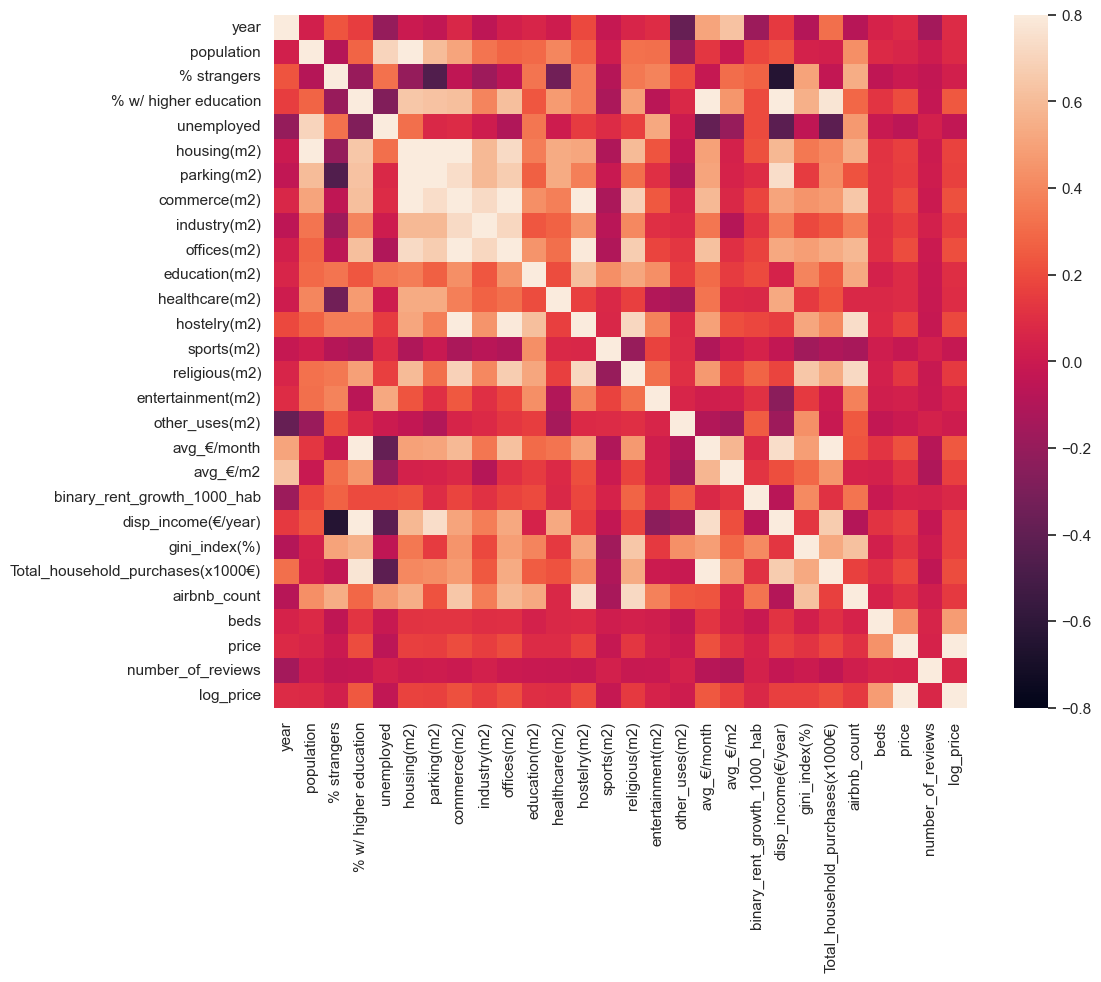

In [64]:
# Select only numeric variables from dataframe
numeric_cols = final_df_imputed.select_dtypes(include=['number'])

# Calculate the correlation matrix and plot heatmap
corrmat = numeric_cols.corr()

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, square=True)
plt.show()

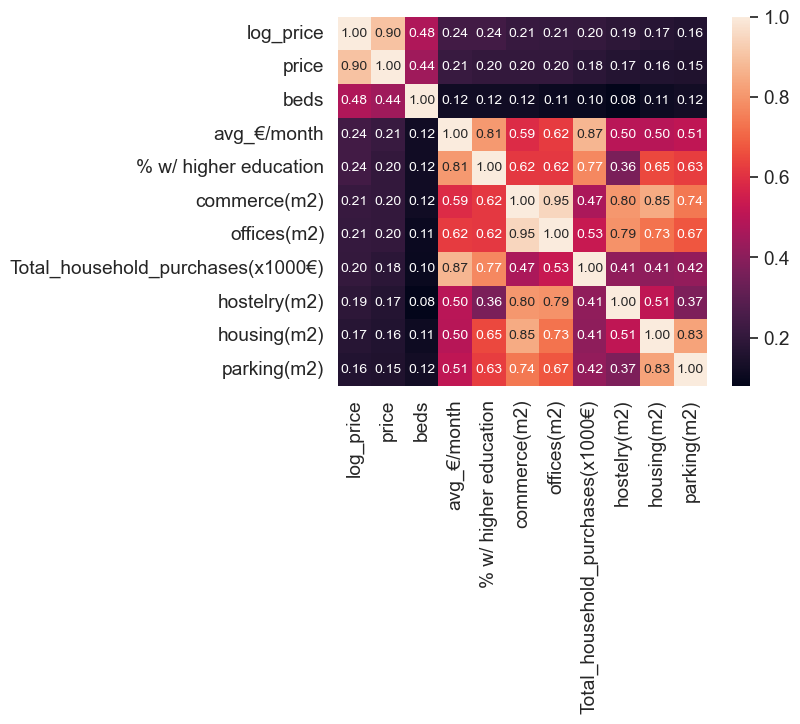

In [65]:
# log_price correlation matrix

# Select 10 variables with highest pairwise correlation to log_price
k = 11  # log_price + 10
cols = corrmat.nlargest(k, 'log_price')['log_price'].index
cm = final_df_imputed[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

To avoid multicollinearity and endogeneity, we drop *% w/ higher education*, *Total_household_purchases(x1000€)*, *avg_€/m2* (correlated with *avg_€/month*) and *price* (linear). Further feature combination will also be performed to address high collinearity.

The new correlation matrix for *log_price* is shown below.

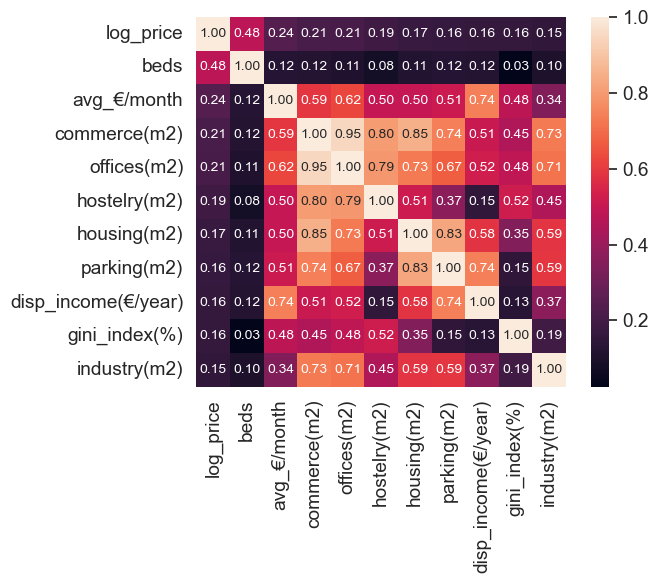

In [66]:
# Drop Total_household_purchases(x1000€), avg_€/m2 and price
final_df_imputed = final_df_imputed.drop(['avg_€/m2'], axis=1)
final_df_imputed = final_df_imputed.drop(['price'], axis=1)
final_df_imputed = final_df_imputed.drop(['% w/ higher education'], axis=1)
final_df_imputed = final_df_imputed.drop(['Total_household_purchases(x1000€)'], axis=1)

# Calculate new correlation matrix
numeric_cols_new = final_df_imputed.select_dtypes(include=['number'])
corrmat_new = numeric_cols_new.corr() 

# Plot correlation matrix again
k = 11  # log_price + 10
cols_new = corrmat_new.nlargest(k, 'log_price')['log_price'].index
cm_new = final_df_imputed[cols_new].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_new, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_new.values, xticklabels=cols_new.values)
plt.show()

From the matrix above, it is possible to see *beds* has the strongest relationship with *log_price* from the features in the dataset: 0.48 correlation coefficient. It is followed by *avg_€/month*, *commerce(m2)* and *offices(m2)*, all with at least 0.2 coefficient scores. Despite this, the traditional rule of thumb adopted to interpret coefficients (proposed by Hinkle et al. in their book *Applied Statistics for the Behavioral Sciences*) states a coefficient between 0.3 to 0.5 is a low correlation (case for *beds*) and 0 to 0.3 is a "little if any correlation" (case for the other variables) (Luna, 2022).

Nevertheless, the coefficient being close to 0 only indicates that there is no linear correlation between variables - it could be that there is a strong non-linear relationship instead (Luna, 2022). The scatter plots below help to visualise this for the variables in the dataset.

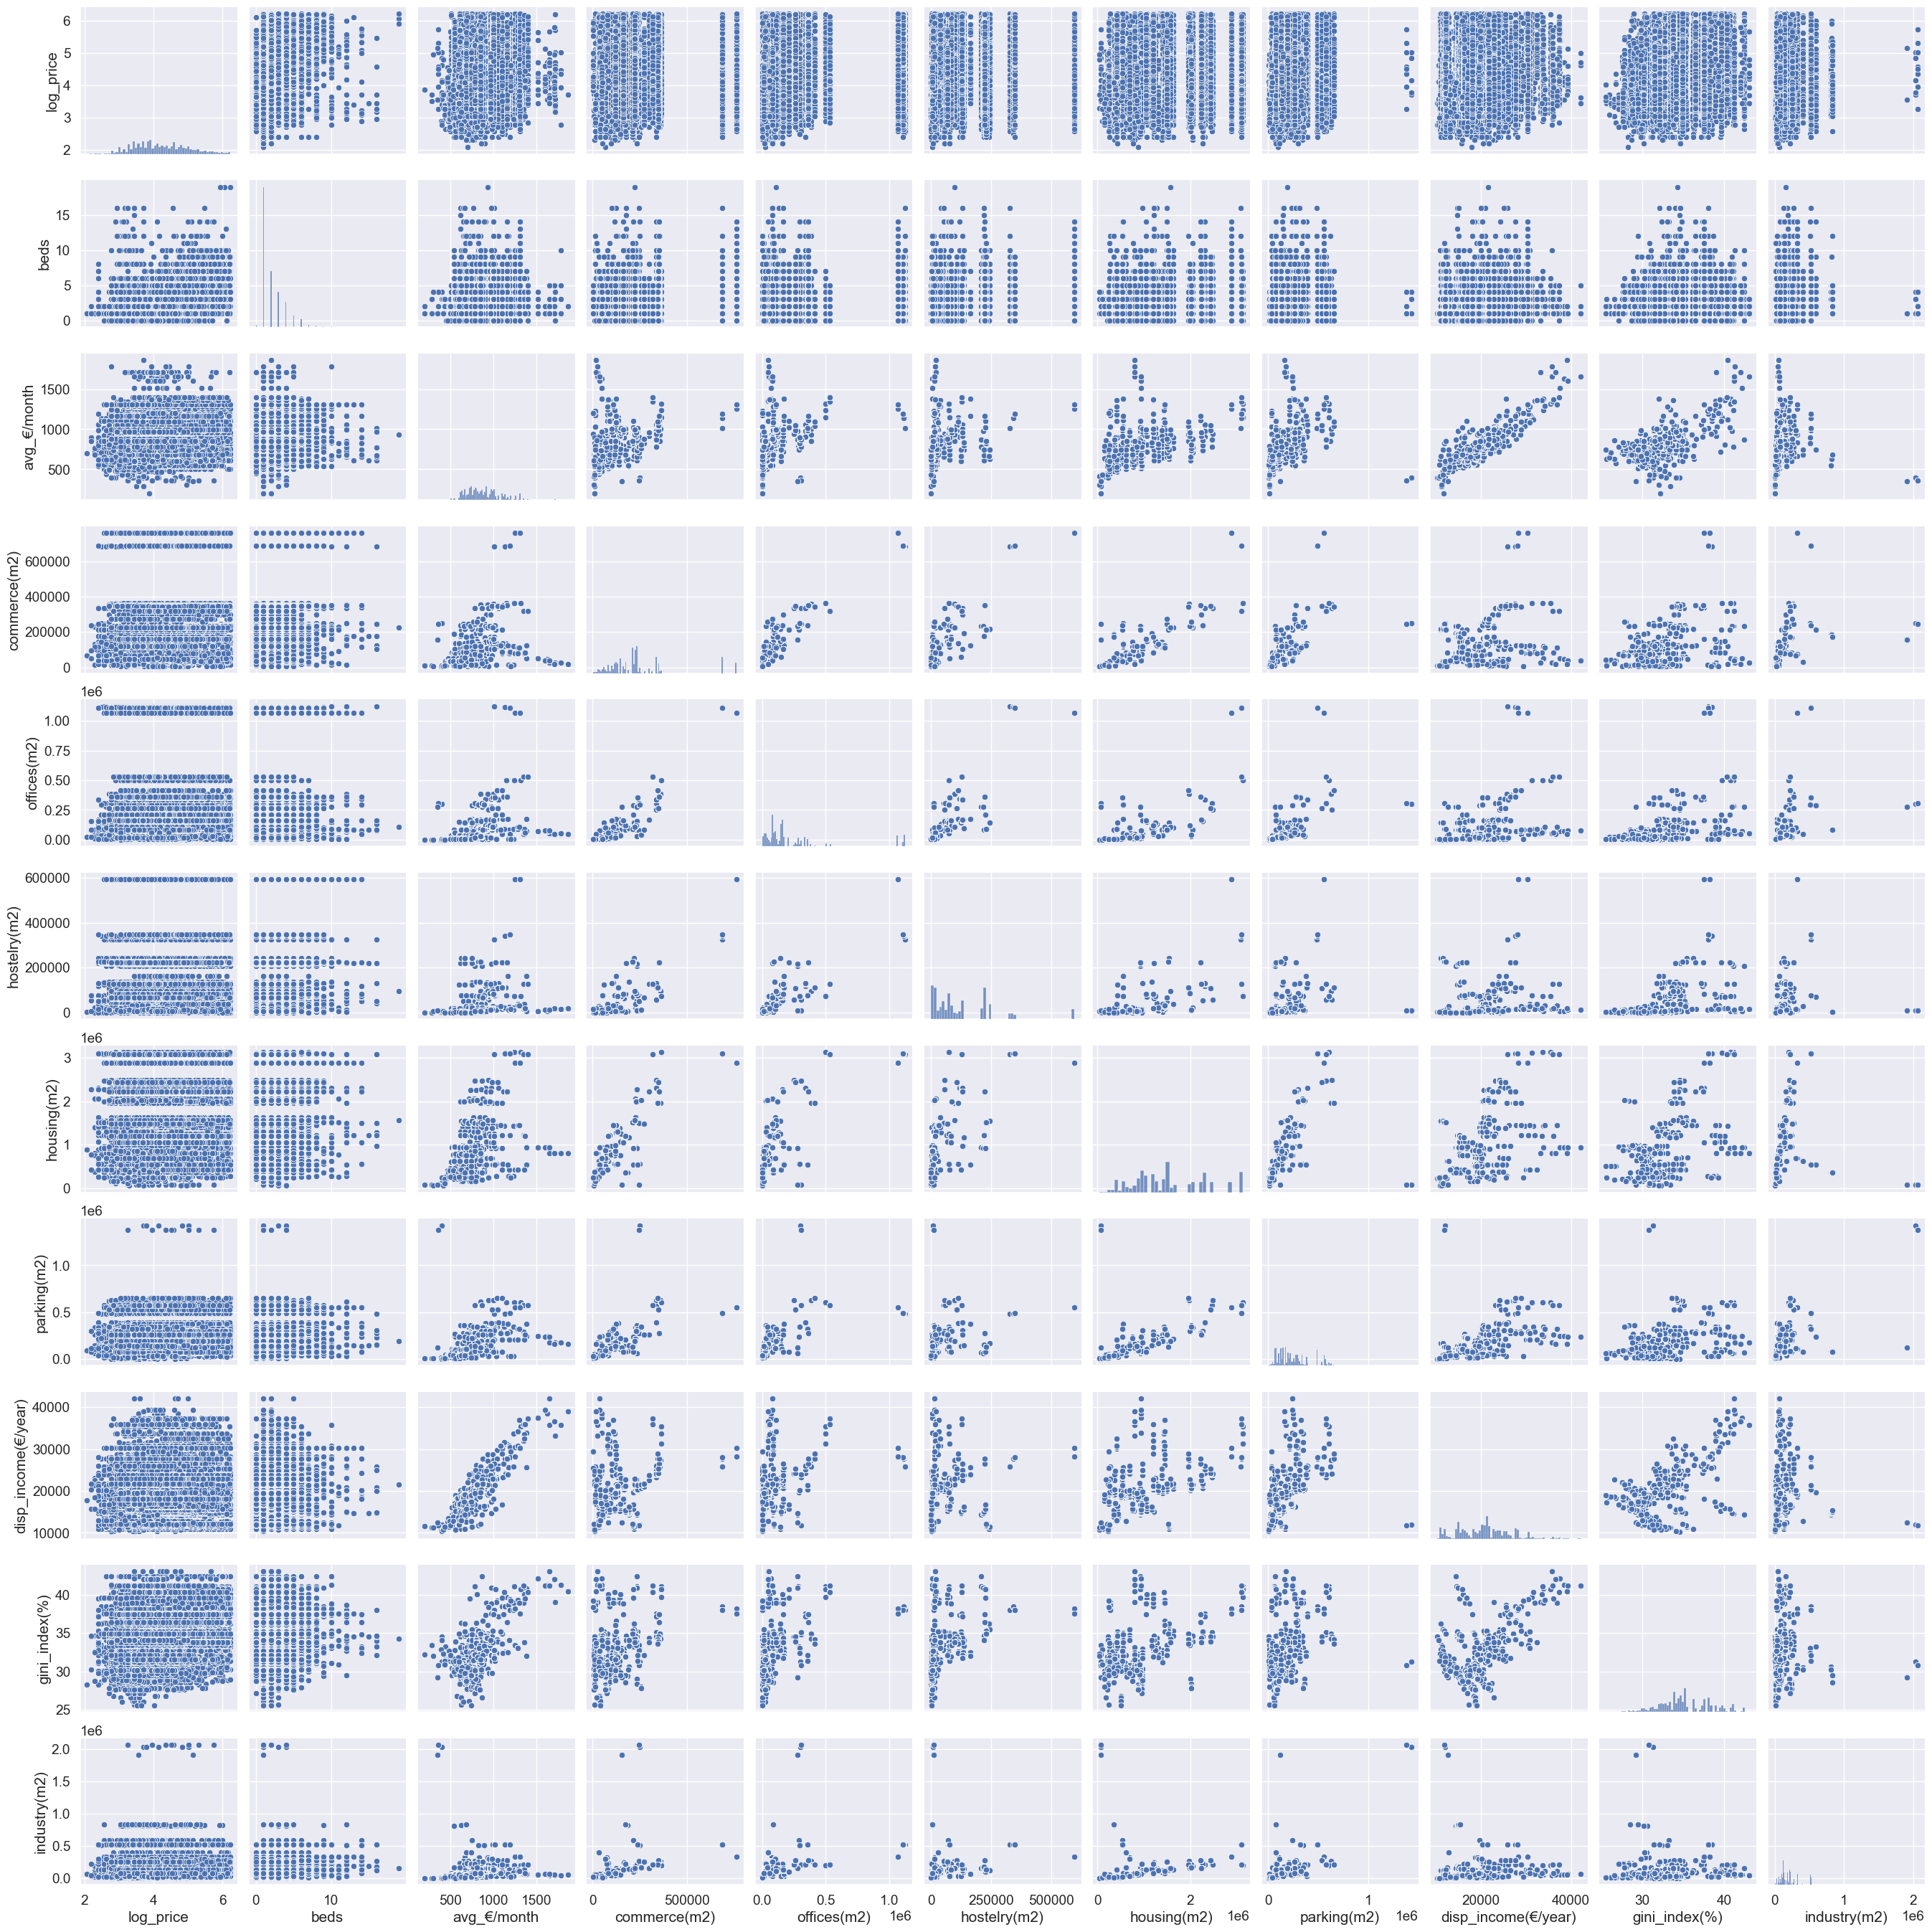

In [67]:
# Plot scatter plots
sns.pairplot(final_df_imputed[cols_new], height = 2.5)
plt.show()

The correlation plots between *log_price* and the other features confirm there is a very weak linear correlation between the dependent and independent variables. This is observed from the lack of a clear pattern on the scatter plots.

#### 3.3 Levels of categorical variables

There are four categorical variables in the dataset: *neighbourhood*, *district*, *property_type* and *room_type*. It is important to check how many levels and their frequency, as it might be interesting to combine some of them.

In [68]:
# Check the number of categories in the variables
print(final_df_imputed["neighbourhood"].value_counts())
print(final_df_imputed["district"].value_counts())
print(final_df_imputed["property_type"].value_counts())
print(final_df_imputed["room_type"].value_counts())

neighbourhood
la dreta de l'eixample                  3341
el raval                                3103
el barri gòtic                          2420
sant pere santa caterina i la ribera    2117
la sagrada família                      1957
                                        ... 
ciutat meridiana                          12
vallbona                                   6
torre baró                                 4
canyelles                                  4
baró de viver                              4
Name: count, Length: 71, dtype: int64
district
Eixample               11078
Ciutat Vella            8610
Sants-Montjuïc          4187
Sant Martí              3638
Gràcia                  2977
Sarrià-Sant Gervasi     1341
Horta-Guinardó          1246
Les Corts               1019
Sant Andreu              693
Nou Barris               572
Moncloa - Aravaca          1
Name: count, dtype: int64
property_type
Entire rental unit             12000
Private room in rental unit    10274
Apartment  

*property_type* presents 80 levels, some with only one observation. We group the less frequent levels as *Others*, adopting 200 observations as a minimum threshhold, reducing the variable to 15 levels.

In [69]:
prop_counts = final_df_imputed["property_type"].value_counts()

# Filter infrequent categories
threshold = 200
infrequent_categories = prop_counts[prop_counts <= threshold].index.tolist()

def replace_with_other(category):
  if category in infrequent_categories:
    return "Others"
  else:
    return category

final_df_imputed['property_type'] = final_df_imputed['property_type'].apply(replace_with_other)

# Print the modified DataFrame with category counts
print(final_df_imputed["property_type"].value_counts())
print(final_df_imputed["property_type"].nunique())

property_type
Entire rental unit                     12000
Private room in rental unit            10274
Apartment                               6358
Others                                  2677
Entire serviced apartment                608
Room in boutique hotel                   590
Entire loft                              395
Private room in condominium (condo)      390
Room in hotel                            357
Entire condominium (condo)               349
Private room in hostel                   336
Private room in residential home         298
Shared room in hostel                    272
House                                    250
Shared room in rental unit               208
Name: count, dtype: int64
15


*district* represents the 10 districts of Barcelona, each containing several of the 73 neighbourhoods. The districts and neighbourhoods are shown below:

**1. Ciutat Vella**
- El Raval
- El Barri Gòtic
- La Barceloneta
- Sant Pere, Santa Caterina i la Ribera

**2. Eixample**
- Fort Pienc
- Sagrada Família
- Dreta de l'Eixample
- L'Antiga Esquerra de l'Eixample
- La Nova Esquerra de l'Eixample
- Sant Antoni

**3. Sants-Montjuïc**
- Poble-sec
- la Marina del Prat Vermell
- la Marina de Port
- la Font de la Guatlla
- Hostafrancs
- la Bordeta
- Sants-Badal
- Sants

**4. Les Corts**
- les Corts
- la Maternitat i Sant Ramon
- Pedralbes

**5. Sarrià-Sant Gervasi**
- Vallvidrera, el Tibidabo i les Planes
- Sarrià
- les Tres Torres
- Sant Gervasi - la Bonanova
- Sant Gervasi - Galvany
- el Putget i Farró

**6. Gràcia**
- Vallcarca i els Penitents
- el Coll
- la Salut
- Vila de Gràcia
- Camp d'en Grassot i Gràcia Nova

**7. Horta-Guinardó**
- el Baix Guinardó
- Can Baró
- el Guinardó
- la Font d'en Fargues
- el Carmel
- la Teixonera
- Sant Genís dels Agudells
- Montbau
- la Vall d'Hebron
- *la Clota*
- Horta

**8. Nou Barris**
- Vilapicina i la Torre Llobeta
- Porta
- el Turó de la Peira
- *Can Peguera*
- la Guineueta
- Canyelles
- les Roquetes
- Verdum
- la Prosperitat
- la Trinitat Nova
- Torre Baró
- Ciutat Meridiana
- Vallbona

**9. Sant Andreu**
- la Trinitat Vella
- Baró de Viver
- Bon Pastor
- Sant Andreu de Palomar
- la Sagrera
- el Congrés i els Indians
- Navas

**10. Sant Martí**
- el Camp de l'Arpa del Clot
- el Clot
- el Parc i la Llacuna del Poblenou
- la Vila Olímpica del Poblenou
- Poblenou
- Diagonal Mar i el Front Marítim del Poblenou
- el Besòs i el Maresme
- Provençals del Poblenou
- Sant Martí de Provençals
- la Verneda i la Pau

*district* presents one category (*Moncloa - Aravaca*) which is actually in Madrid and is therefore excluded.

In [70]:
# Drop extra district
final_df_imputed = final_df_imputed[final_df_imputed["district"] != "Moncloa - Aravaca"]

# Check the shape of final_df_imputed after the filtering
final_df_imputed.shape

(35361, 28)

### 4. Feature engineering

Feature engineering is a preprocessing step that involves the manipulation of data to improve performance and accuracy of machine learning model training. It includes transformations such as turning categorical variables into dummy variables, scaling and centering, and feature combination.

#### 4.1 Categorical variables to dummy variables

The categorical variables in the dataset (*neighbourhood*, *district*, *property_type* and *room_type*) are all nominal variables. Therefore, the most appropriate method for turning them into a numerical representation would be through One-Hot encoding (a binary representation - 0 or 1) instead of Label encoding (0 to n-1 classes). However, since *neighbourhood* has 71 levels (meaning applying one-hot encoding would create 71 new columns), we remove this variable and use *district* - which bins the neighbourhoods - for model simplicity.

The *year* variable, despite being numerical, represents only 5 years (2015 to 2019). Hence we encode it using LabelEncoder.

In [72]:
# Save districts and neighbourhoods in a separated df and remove neighbourhoods
districts_and_neighbourhoods = final_df_imputed[["district", "neighbourhood"]]
feateng = final_df_imputed.copy(deep=True)
feateng.drop("neighbourhood", axis = 1, inplace = True)

# Convert categorical variables into dummies
feateng_cat = feateng.select_dtypes(include=['object'])
feateng_cat = pd.get_dummies(feateng_cat, columns=["district", "property_type", "room_type"], drop_first=True, dtype=int)
feateng = feateng.drop(["district", "property_type", "room_type"], axis=1)
feateng_df = pd.concat([feateng, feateng_cat], axis=1)

# Convert year
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(feateng_df["year"])
feateng_df["year"] = le.transform(feateng_df["year"])

# Check the dataframe
feateng_df.head()

year  population  % strangers  unemployed  housing(m2)  parking(m2)  \
0     0      2482.0         10.3       150.0        80219        10269   
1     0      2482.0         10.3       150.0        80219        10269   
2     0      8938.0         13.1       442.0       318343        30196   
3     0      8938.0         13.1       442.0       318343        30196   
4     0      8938.0         13.1       442.0       318343        30196   

   commerce(m2)  industry(m2)  offices(m2)  education(m2)  ...  \
0         11414          2004          651           5883  ...   
1         11414          2004          651           5883  ...   
2         22289         25347         4059           7800  ...   
3         22289         25347         4059           7800  ...   
4         22289         25347         4059           7800  ...   

   property_type_Private room in hostel  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   property_type_Private room in rental unit  \
0                                          0   
1                                          1   
2                                          0   
3                                          0   
4                                          0   

   property_type_Private room in residential home  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   property_type_Room in boutique hotel  property_type_Room in hotel  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   property_type_Shared room in hostel  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   property_type_Shared room in rental unit  room_type_Hotel room  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     0   

   room_type_Private room  room_type_Shared room  
0                       0                      0  
1                       1                      0  
2                       0                      1  
3                       1                      0  
4                       1                      0  

[5 rows x 50 columns]

#### 4.2 Feature combination

Feature combination can be used to improve model performance and avoid issues of multicollinearity by combining the strength of complementary variables.

The dataset contains features with land use area per neighbourhood for different activities. In this step we combine some of these features by performing arithmetic addition of related activities:
- *economic_act* = *commerce(m2)* + *industry(m2)* + *offices(m2)* + *hostelry(m2)*
- *basic_serv* = *education(m2)* + *healthcare(m2)*
- *leisure_act* = *entertainment(m2)* + *sports(m2)*

In [73]:
# Combine features in the dataset
feateng_df["economic_act"] = feateng_df["commerce(m2)"] + feateng_df["industry(m2)"] + feateng_df["offices(m2)"] + feateng_df["hostelry(m2)"]
feateng_df["basic_serv"] = feateng_df["education(m2)"] + feateng_df["healthcare(m2)"]
feateng_df["leisure_act"] = feateng_df["entertainment(m2)"] + feateng_df["sports(m2)"]

# Drop features
feateng_df = feateng_df.drop(["commerce(m2)", "industry(m2)", "offices(m2)", "hostelry(m2)", "education(m2)",
                             "healthcare(m2)", "entertainment(m2)", "sports(m2)"], axis=1)

# Check dataset
feateng_df.head()

year  population  % strangers  unemployed  housing(m2)  parking(m2)  \
0     0      2482.0         10.3       150.0        80219        10269   
1     0      2482.0         10.3       150.0        80219        10269   
2     0      8938.0         13.1       442.0       318343        30196   
3     0      8938.0         13.1       442.0       318343        30196   
4     0      8938.0         13.1       442.0       318343        30196   

   religious(m2)  other_uses(m2)  avg_€/month  binary_rent_growth_1000_hab  \
0            224             307     284.5800                          0.0   
1            224             307     284.5800                          0.0   
2              0              54     549.2775                          0.0   
3              0              54     549.2775                          0.0   
4              0              54     549.2775                          0.0   

   ...  property_type_Room in boutique hotel  property_type_Room in hotel  \
0  ...                                     0                            0   
1  ...                                     0                            0   
2  ...                                     0                            0   
3  ...                                     0                            0   
4  ...                                     0                            0   

   property_type_Shared room in hostel  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   property_type_Shared room in rental unit  room_type_Hotel room  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     0   

   room_type_Private room  room_type_Shared room  economic_act  basic_serv  \
0                       0                      0         14069        5883   
1                       1                      0         14069        5883   
2                       0                      1         53473       10135   
3                       1                      0         53473       10135   
4                       1                      0         53473       10135   

   leisure_act  
0          0.0  
1          0.0  
2       1112.0  
3       1112.0  
4       1112.0  

[5 rows x 45 columns]

#### 4.3 Scaling and centering

Machine learning algorithms often assume all features contribute equally to the final prediction. However, real-world data normally varies in range and unit, which can lead features on larger scales to disproportionately influence the model. This is why normalising or standardising the data plays a key role in data preprocessing as it ensures uniformity of numerical magnitudes (Jaiswal, 2024).

Standardization (or Z-score normalization) assumes a normal distribution (Gaussian) and transforms features to have a mean of 0 and standard deviation of 1. It represents features in terms of the number of standard deviations away from the mean. Normalization (or Min-Max scaling) takes features and transforms them to a specified range (normally between 0 and 1). Other scaling techniques include log scaling normalization and robust scaling normalization (Jaiswal, 2024).

Here we apply the log scale as some predictors are highly skewed as seen in the histograms in section 2.1. For *population*, standardization is applied since the range for this variable is considerably higher than the others in the dataset. After that, data is split into train and test sets. The ratio adopted is 70-30% using the random method.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feateng_df = feateng_df.reset_index(drop=True)

# Copy df for scaling
feateng_df_scaled = feateng_df.copy(deep=True)

# Features to scale
feat_to_scale = ["% strangers", "unemployed", "housing(m2)", "parking(m2)", "religious(m2)", "other_uses(m2)", "avg_€/month",
                 "economic_act", "basic_serv", "leisure_act", "disp_income(€/year)", "beds", "number_of_reviews"]

# Select subset
scaled_subset = feateng_df_scaled[feat_to_scale]

# Scale data
log_feat = np.log1p(scaled_subset)

# Replace on original df
feateng_df_scaled[feat_to_scale] = log_feat

# Scale population
scaler = StandardScaler()
scaler.fit(feateng_df_scaled["population"].values.reshape(-1, 1))
feateng_df_scaled["population"] = scaler.transform(feateng_df_scaled["population"].values.reshape(-1, 1))

# Separate target and predictors
X_scaled = feateng_df_scaled.drop("log_price", axis=1)
y_scaled = feateng_df_scaled["log_price"]

print(X_scaled.head())

# Apply train_test_split
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Check the datasets
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

   year  population  % strangers  unemployed  housing(m2)  parking(m2)  \
0     0   -2.358892     2.424803     5.01728    11.292528     9.236982   
1     0   -2.358892     2.424803     5.01728    11.292528     9.236982   
2     0   -1.891333     2.646175     6.09357    12.670888    10.315498   
3     0   -1.891333     2.646175     6.09357    12.670888    10.315498   
4     0   -1.891333     2.646175     6.09357    12.670888    10.315498   

   religious(m2)  other_uses(m2)  avg_€/month  binary_rent_growth_1000_hab  \
0         5.4161        5.730100     5.654522                          0.0   
1         5.4161        5.730100     5.654522                          0.0   
2         0.0000        4.007333     6.310423                          0.0   
3         0.0000        4.007333     6.310423                          0.0   
4         0.0000        4.007333     6.310423                          0.0   

   ...  property_type_Room in boutique hotel  property_type_Room in hotel  \
0  ...   

### 5. Modelling and data analysis

Supervised machine learning algorithms employ labelled data to solve problems of two types: classification or regression. Classification models are used for predicting discrete outcomes, whereas regression algorithms predict continuous values (All, 2022). As prices are continuous values, regression models are built and evaluated.

Therefore, the models trained and tested here are Linear Regression (OLS), Lasso Regression (L1), Ridge Regression (L2) and ElasticNet. Lasso, Ridge and ElasticNet are regularization techniques aimed to decrease the large variance OLS models might present when there are many predictor variables or those variables are correlated. In other words, regularization reduces overfitting and improve generalisation of machine learning models by introducing a penalty term (Machine Learning in Plain English, 2023; Oleszak, 2019).

Lasso penalizes the sum of absolute values of the coefficients, encouraging the model to reduce the number of features used. Ridge penalizes the sum of squared coefficients, leading the model to use smaller weights thus reducing the impact of individual features on the output. ElasticNet is a combination of the penalties of lasso and ridge (Machine Learning in Plain English, 2023; Oleszak, 2019).

Furthermore, we cross validate the models to ensure model performance is not dependent on the way the data is split. GrindSearchCV is used to hyperparameter tuning.

In [75]:
# Import packages
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

#### 5.1 Models with untransformed predictors

The models are trained both on untransformed and scaled predictors to compare which one performs best.

In [76]:
# Split untransformed data on train and test sets

# Separate target and predictors
X = feateng_df.drop("log_price", axis=1)
y = feateng_df["log_price"]

# Apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24752, 44)
(24752,)
(10609, 44)
(10609,)


#### Define optimal parameters with GridSearchCV, train and test models

In [77]:
# Define parameters for GridSearchCV
param_grid = {
    "Linear Regression": {},  # No parameters for linear regression
    "Lasso": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "Ridge": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {"alpha": [0.001, 0.01, 0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9, 1]},
}

# Define models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
}

# Define KFold cross-validation within the training set
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
best_params = {}
rmse_results = {}
train_rmse_results = {}
r2_results = {}

# Perform GridSearchCV and train models
for model_name, model in models.items():
  grid_search = GridSearchCV(model, param_grid=param_grid[model_name], cv=cv)
  grid_search.fit(X_train, y_train)
  model_best_params = model.set_params(**grid_search.best_params_)  # Set best parameters for the model

  best_params[model_name] = model_best_params

  # Train the model on the entire training set (after GridSearchCV)
  model.fit(X_train, y_train)

  # Evaluate the model on the training set for RMSE
  y_pred_train = model.predict(X_train)
  train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)  # Root Mean Squared Error

  train_rmse_results[model_name] = train_rmse

  # Evaluate the model on the test set
  y_pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False) # Root Mean Squared Error
  r2 = r2_score(y_test, y_pred)
    
  rmse_results[model_name] = rmse
  r2_results[model_name] = r2
    
# Print results
print("Best parameters for each model:")
for model_name, model_best_params in best_params.items():
  print(f"{model_name}: {model_best_params}")

print("\nTrain RMSE Results:")
for model_name, train_rmse in train_rmse_results.items():
  print(f"{model_name}: {train_rmse:.4f}")

print("\nTest RMSE Results:")
for model_name, rmse in rmse_results.items():
  print(f"{model_name}: {rmse:.4f}")

print("\nTest R² Results:")
for model_name, r2 in r2_results.items():
  print(f"{model_name}: {rmse:.4f}")

Best parameters for each model:
Linear Regression: LinearRegression()
Lasso: Lasso(alpha=0.001)
Ridge: Ridge(alpha=1)
ElasticNet: ElasticNet(alpha=0.001, l1_ratio=0.1)

Train RMSE Results:
Linear Regression: 0.5482
Lasso: 0.5497
Ridge: 0.5482
ElasticNet: 0.5489

Test RMSE Results:
Linear Regression: 0.5408
Lasso: 0.5419
Ridge: 0.5408
ElasticNet: 0.5414

Test R² Results:
Linear Regression: 0.5414
Lasso: 0.5414
Ridge: 0.5414
ElasticNet: 0.5414


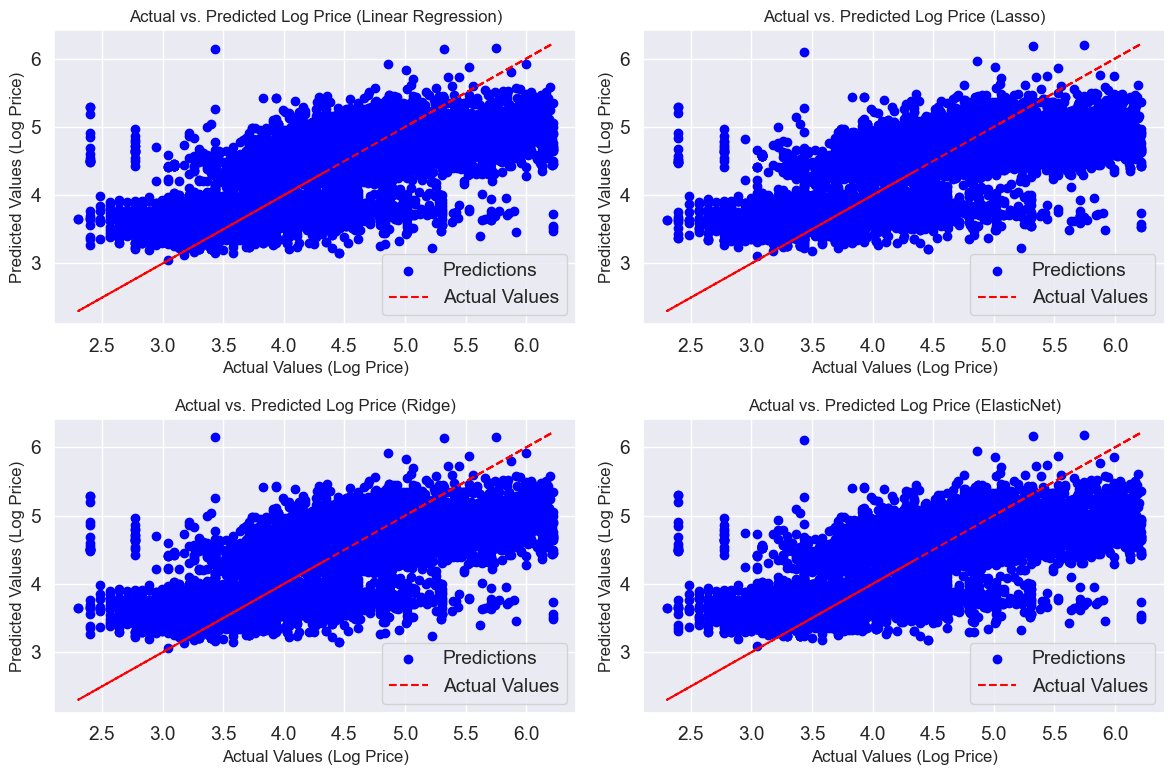

In [78]:
# Define number of rows and columns for subplot grid
nrows = 2
ncols = 2

# Counter for plot numbering
plot_count = 1

# Set figure size
plt.figure(figsize=(12, 8))

# Create plots for each model's predictions on the test set
for model_name, model in models.items():
  y_pred = model.predict(X_test)

  # Create subplot based on counter
  plt.subplot(nrows, ncols, plot_count)
  plot_count += 1

  plt.scatter(y_test, y_pred, color="blue", label="Predictions")
  plt.plot(y_test, y_test, color="red", linestyle="--", label="Actual Values")
  plt.xlabel("Actual Values (Log Price)", fontsize=12)
  plt.ylabel("Predicted Values (Log Price)", fontsize=12)
  plt.title(f"Actual vs. Predicted Log Price ({model_name})", fontsize=12)
  plt.legend()
  plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

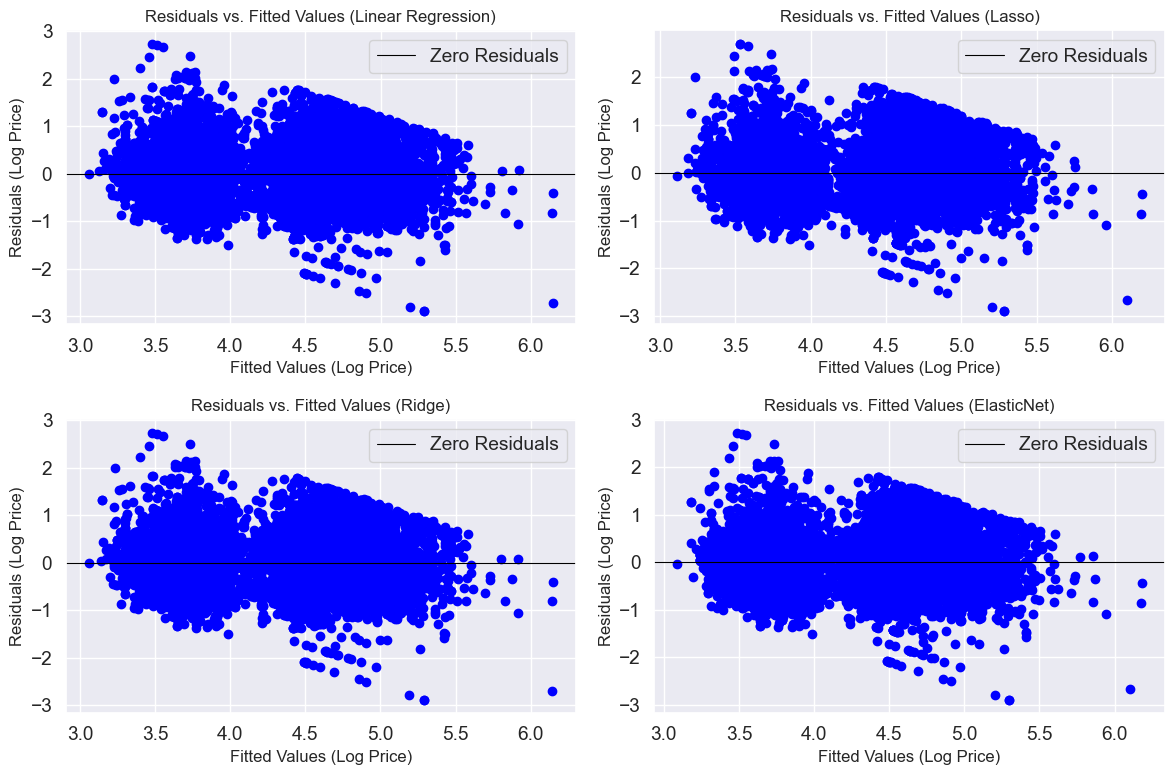

In [79]:
# Define number of rows and columns for subplot grid
nrows_r = 2
ncols_r = 2

# Counter for plot numbering
plot_count_r = 1

# Set figure size
plt.figure(figsize=(12, 8))

# Create Residuals vs Fits plots for each model
for model_name, model in models.items():
  y_pred = model.predict(X_test)
  residuals = y_test - y_pred

  # Create subplot based on counter
  plt.subplot(nrows_r, ncols_r, plot_count_r)
  plot_count_r += 1

  plt.scatter(y_pred, residuals, color='blue')
  plt.xlabel('Fitted Values (Log Price)', fontsize=12)
  plt.ylabel('Residuals (Log Price)', fontsize=12)
  plt.title(f'Residuals vs. Fitted Values ({model_name})', fontsize=12)

  # Line at y=0 (zero residuals)
  x_min, x_max = plt.xlim()  # Get x-axis limits
  plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8, label='Zero Residuals')

  plt.grid(True)
  plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#### 5.2 Models with scaled predictors

In [80]:
# Define parameters for GridSearchCV
param_grid_scaled = {
    "Linear Regression": {},  # No parameters for linear regression
    "Lasso": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "Ridge": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {"alpha": [0.001, 0.01, 0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9, 1]},
}

# Define models dictionary
models_scaled = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
}

# Define KFold cross-validation within the training set
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
best_params_scaled = {}
rmse_results_scaled = {}
train_rmse_results_scaled = {}
r2_results_scaled = {}

# Perform GridSearchCV and train models
for model_name, model in models_scaled.items():
  grid_search_scaled = GridSearchCV(model, param_grid=param_grid_scaled[model_name], cv=cv)
  grid_search_scaled.fit(X_train_scaled, y_train_scaled)
  model_best_params_scaled = model.set_params(**grid_search_scaled.best_params_)  # Set best parameters for the model

  best_params_scaled[model_name] = model_best_params_scaled

  # Train the model on the entire training set (after GridSearchCV)
  model.fit(X_train_scaled, y_train_scaled)
    
  # Evaluate the model on the training set for RMSE
  y_pred_train_scaled = model.predict(X_train_scaled)
  train_rmse_scaled = mean_squared_error(y_train_scaled, y_pred_train_scaled, squared=False)  # Root Mean Squared Error

  train_rmse_results_scaled[model_name] = train_rmse_scaled

  # Evaluate the model on the test set
  y_pred_scaled = model.predict(X_test_scaled)
  rmse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False) # Root Mean Squared Error
  r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

  rmse_results_scaled[model_name] = rmse_scaled
  r2_results_scaled[model_name] = r2_scaled
    
# Print results
print("Best parameters for each model with scaled predictors:")
for model_name, model_best_params in best_params_scaled.items():
  print(f"{model_name}: {model_best_params}")

print("\nTrain RMSE Results with scaled predictors:")
for model_name, train_rmse in train_rmse_results_scaled.items():
  print(f"{model_name}: {train_rmse:.4f}")

print("\nTest RMSE Results with scaled predictors:")
for model_name, rmse in rmse_results_scaled.items():
  print(f"{model_name}: {rmse:.4f}")

print("\nTest R² Results with scaled predictors:")
for model_name, r2 in r2_results_scaled.items():
  print(f"{model_name}: {rmse:.4f}")

Best parameters for each model with scaled predictors:
Linear Regression: LinearRegression()
Lasso: Lasso(alpha=0.001)
Ridge: Ridge(alpha=1)
ElasticNet: ElasticNet(alpha=0.001, l1_ratio=0.1)

Train RMSE Results with scaled predictors:
Linear Regression: 0.5451
Lasso: 0.5469
Ridge: 0.5451
ElasticNet: 0.5458

Test RMSE Results with scaled predictors:
Linear Regression: 0.5387
Lasso: 0.5396
Ridge: 0.5387
ElasticNet: 0.5391

Test R² Results with scaled predictors:
Linear Regression: 0.5391
Lasso: 0.5391
Ridge: 0.5391
ElasticNet: 0.5391


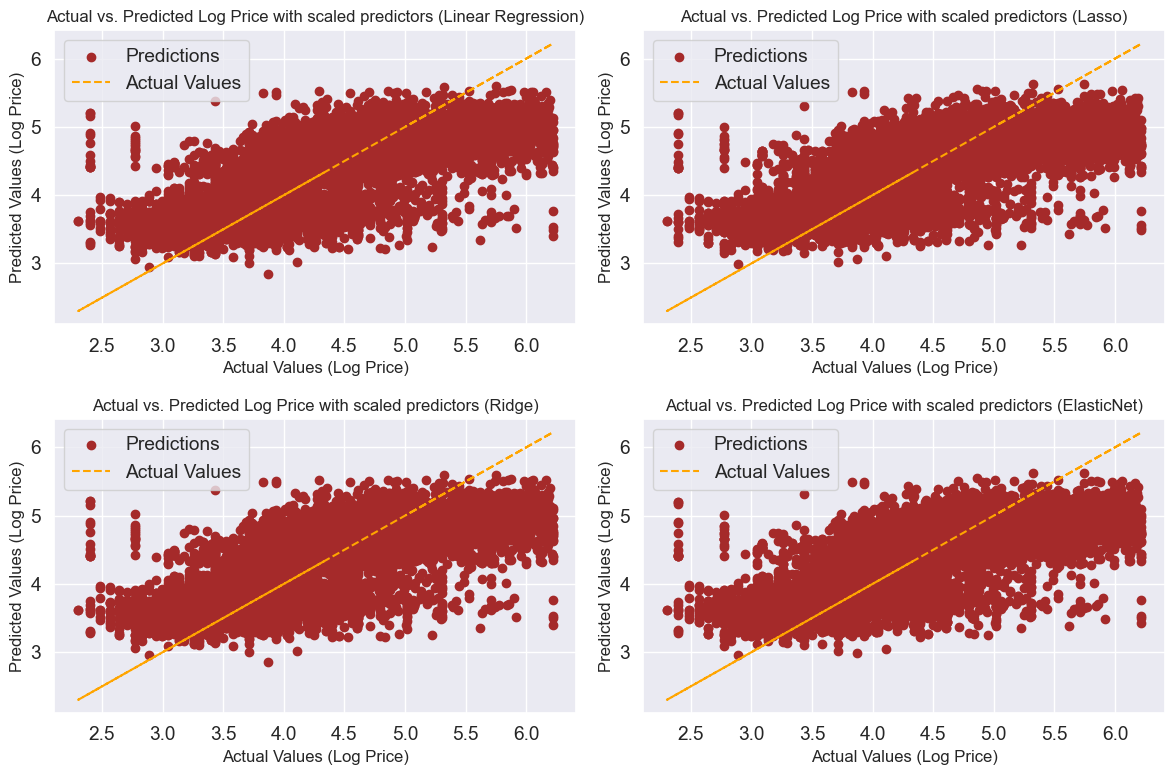

In [81]:
# Define number of rows and columns for subplot grid
nrows_s = 2
ncols_s = 2

# Counter for plot numbering
plot_count_s = 1

# Set figure size
plt.figure(figsize=(12, 8))

# Create plots for each model's predictions on the test set
for model_name, model in models_scaled.items():
  y_pred_scaled = model.predict(X_test_scaled)

  # Create subplot based on counter
  plt.subplot(nrows_s, ncols_s, plot_count_s)
  plot_count_s += 1

  plt.scatter(y_test_scaled, y_pred_scaled, color="brown", label="Predictions")
  plt.plot(y_test_scaled, y_test_scaled, color="orange", linestyle="--", label="Actual Values")
  plt.xlabel("Actual Values (Log Price)", fontsize=12)
  plt.ylabel("Predicted Values (Log Price)", fontsize=12)
  plt.title(f"Actual vs. Predicted Log Price with scaled predictors ({model_name})", fontsize=12)
  plt.legend()
  plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

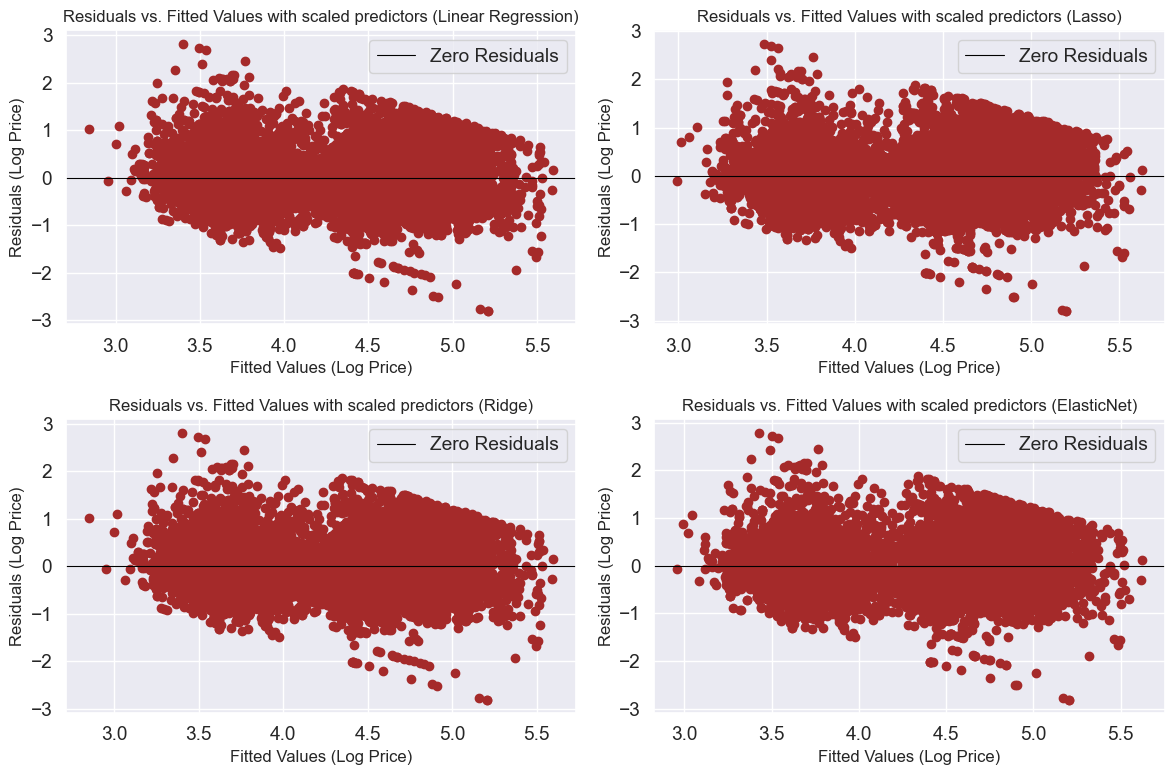

In [82]:
# Define number of rows and columns for subplot grid
nrows_rs = 2
ncols_rs = 2

# Counter for plot numbering
plot_count_rs = 1

# Set figure size
plt.figure(figsize=(12, 8))

# Create Residuals vs Fits plots for each model
for model_name, model in models_scaled.items():
  y_pred_scaled = model.predict(X_test_scaled)
  residuals_scaled = y_test_scaled - y_pred_scaled

  # Create subplot based on counter
  plt.subplot(nrows_rs, ncols_rs, plot_count_rs)
  plot_count_rs += 1

  plt.scatter(y_pred_scaled, residuals_scaled, color='brown')
  plt.xlabel('Fitted Values (Log Price)', fontsize=12)
  plt.ylabel('Residuals (Log Price)', fontsize=12)
  plt.title(f'Residuals vs. Fitted Values with scaled predictors ({model_name})', fontsize=12)

  # Line at y=0 (zero residuals)
  x_min, x_max = plt.xlim()  # Get x-axis limits
  plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8, label='Zero Residuals')

  plt.grid(True)
  plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#### 5.3 Analysis

Overall, there are similar train and test root mean squared errors (RMSE) scores for both untransformed and scaled models. RMSE measures the average difference between predicted *log_price* values and the actual values. Therefore, the lower the RMSE value, the better the model is. Looking exclusively at test RMSE results, one could say models with scaled predictors perform better than those with untransformed independent variables. In this case, Linear Regression and Ridge Regularization were the best performing models with 0.5387.

Despite this, the difference to Elastic Net and Lasso Regularization models is marginal: 0.0004 and 0.0009 respectively, as the plot below illustrates. Thus it is hard to affirm which model has the strongest regression performance based solely on RMSE scores. For this reason, the coefficients of determination (R²) were also calculated for the test sets. R² estimates how much of the proportion of variance of the target variable is explained by the predictors (Gill et al., 2023).

However, R² scores are identical for all the four models. Actual vs. Predicted plots are also very similar and show the models consistently under and over predict actual prices. Residuals vs. Fitted plots (which also present similarities) demonstrate a residual pattern that is not random, indicating bias and a bad fit of the data to the models. These results suggest models are not generalisable and underspecified, i.e. there might be missing important independent variables. Moreover, the features in the models have very low correlation to the target variable and may be overfitting, hence causing an artificial inflation of R² values (Frost, 2018a).

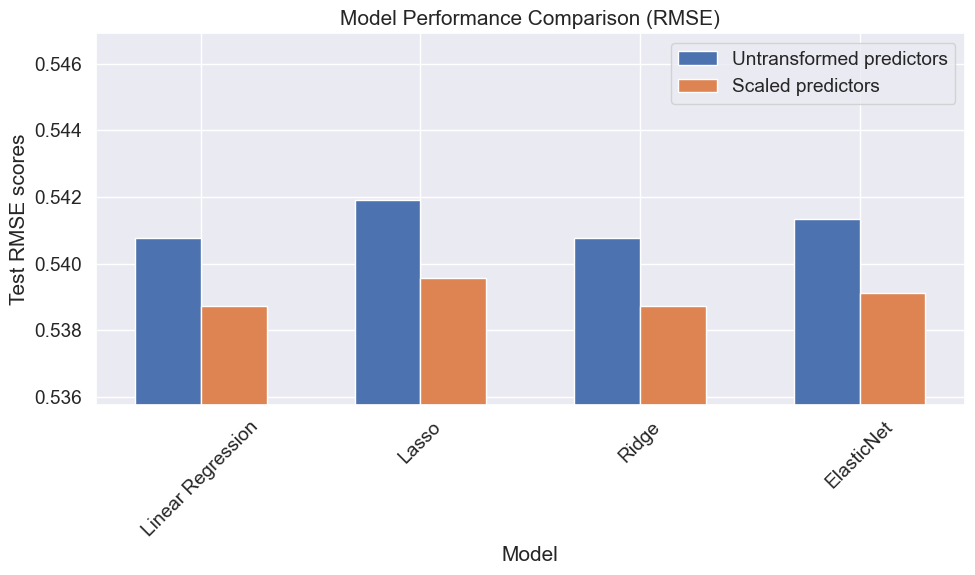

In [83]:
# Define x-axis positions for each set of bars
x_pos = np.arange(len(rmse_results.keys()))  # Positions for untransformed data
x_pos_scaled = [p + 0.3 for p in x_pos]  # Positions for scaled data with a small offset

# Plot the results (single bar plot with positions and separate values)
plt.figure(figsize=(10, 6))
plt.bar(x_pos, rmse_results.values(), label="Untransformed predictors", width=0.3)
plt.bar(x_pos_scaled, rmse_results_scaled.values(), label="Scaled predictors", width=0.3)
plt.xlabel("Model")
plt.ylabel("Test RMSE scores")
plt.title("Model Performance Comparison (RMSE)")
plt.legend(loc="upper right")
plt.xticks([p + 0.15 for p in x_pos], rmse_results.keys(), rotation=45)  # Adjust xtick positions

# Get minimum and maximum RMSE values with a small buffer
min_rmse = min(rmse_results.values()) - 0.005
max_rmse = max(rmse_results.values()) + 0.005  

# Set y-axis limits based on min and max RMSE with buffer
plt.ylim(min_rmse, max_rmse)

plt.tight_layout()
plt.show()

#### 6. Discussion and conclusions

This project aimed to develop a regression machine learning model to predict prices of Airbnb listings in neighbourhoods of Barcelona. To do this, four models were trained and tested using two sets of features (untransformed and scaled) to predict *log_price*: Linear Regression (OLS), Lasso Regularization, Ridge Regularization and ElasticNet. Despite this, results obtained indicate they do not perform well. Therefore, it is not possible to make generalisations about the findings or to address the research question of this study satisfactorily.

The data for this analysis were from Kaggle and consisted of curated data for Airbnb listings from Inside Airbnb and public data for social and economic indicators on a neighbourhood level. We attempted to verify if those statistical measurements had any influence on prices based on studies that also included those types of variables in their models (Garcia-López et al., 2020; Valente et al., 2023) but results demonstrated a weak relationship between features and target variable. Moreover, it is likely there were issues of multicollinearity even though the preprocessing stage addressed these and advanced regression models like Lasso and Ridge were used, which are less sensitive to multicollinearity when compared to OLS (Frost, 2018b).

Considering these limitations, future works should consider including features with higher correlation and predictive power over price. The dataset from Kaggle excluded many potentially relevant features that normally comes on downloaded data from Inside Airbnb (such as number of bathrooms and bedrooms). Since this analysis considered listings in the period ranging from 2015 to 2019 and Inside Airbnb only provides free downloads for listings in the last 12 months, it was not possible to extract these features directly from the project's website.

Furthermore, other algorithms could be trained and tested to see if they perform better compared to the ones developed here. Random Forest, Support Vector Regression and Neural Networks are some of the models that have been used in the literature to predict Airbnb prices (Alharbi, 2023; Kalehbasti et al., 2021). Approaching price prediction as a classification problem (e.g., binning prices in different categories and predicting where a listing would fall into) would enable using Logistic Regression and other models that might have a better performance than regression models. Due to limitations on the extension of this project, it was opted to perform only the four aforementioned models.

#### Word count: 3,256

### Bibliography

Alharbi, Z. H. 2023. A Sustainable Price Prediction Model for Airbnb Listings Using Machine Learning and Sentiment Analysis. *Sustainability*. **15**.

All, M. 2022. *Supervised Machine Learning*. [Online]. [Accessed 22 March 2024]. Available from: https://www.datacamp.com/blog/supervised-machine-learning.

Álvarez-Herranz, A. and Macedo-Ruíz, E. 2021. An Evaluation of the Three Pillars of Sustainability in Cities with High Airbnb Presence: A Case Study of the City of Madrid. *Sustainability*. **13**(6).

Deboosere, R.; Kerrigan, D. J.; Wachsmuth, D.; and El-Geneidy, A. 2019. Location, location and professionalization: a multilevel hedonic analysis of Airbnb listing prices and revenue. *Regional Studies, Regional Science*. **6**(1), pp. 143-156.

Frost, J. 2018a. *How To Interpret R-squared in Regression Analysis*. [Online]. [Accessed 27 March 2024]. Available from: https://statisticsbyjim.com/regression/interpret-r-squared-regression/.

Frost, J. 2018b. *Choosing the Correct Type of Regression Analysis*. [Online]. [Accessed 29 March 2024]. Available from: https://statisticsbyjim.com/regression/choosing-regression-analysis/.

Gant, A. C. 2016. Holiday Rentals: The New Gentrification Battlefront. *Sociological Research Online*. **21**(3), pp. 112-120.

Garcia-López, M. A.; Jofre-Monseny, J.; Martínez-Mazza, R.; and Segú, M. 2020. Do short-term rental platforms affect housing markets? Evidence from Airbnb in Barcelona. *Journal of Urban Economics*. **119**.

Gill, J.; Moullet, M.; Martinsson, A.; Miljković, F.; Williamson, B.; Arends, R.H.; and Pilla Reddy, V. 2023. Evaluating the performance of machine-learning regression models for pharmacokinetic drug-drug interactions. *CPT Pharmacometrics Syst Pharmacol*. **12**(1), pp. 122-134.

Jaiswal, S. 2024. *What is Normalization in Machine Learning? A Comprehensive Guide to Data Rescaling*. [Online]. [Accessed 21 March 2024]. Available from: https://www.datacamp.com/tutorial/normalization-in-machine-learning.

Kalehbasti, P.R.; Nikolenko, L.; and Rezaei, H. 2021. Airbnb Price Prediction Using Machine Learning and Sentiment Analysis. In: Holzinger, A.; Kieseberg, P.; Tjoa, A.M.; and Weippl, E. eds. *International Cross-Domain Conference for Machine Learning and Knowledge Extraction. CD-MAKE 2021: Machine Learning and Knowledge Extraction, August 17–20, 2021, Virtual event*. Springer, pp. 173–184.

Luna, J. C. 2022. *Python Details on Correlation Tutorial*. [Online]. [Accessed 17 March 2024]. Available from: https://www.datacamp.com/tutorial/tutorial-datails-on-correlation.

Machine Learning in Plain English. 2023. *Lesson 18 — Machine Learning: Regularization Techniques: L1 (Lasso) and L2 (Ridge) Regularization Intuition*. [Online]. [Accessed 22 March 2024]. Available from: https://medium.com/@nerdjock/lesson-18-machine-learning-regularization-techniques-l1-lasso-and-l2-ridge-regularization-b9dc312c71fe.

Oleszak, M. 2019. *Regularization in R Tutorial: Ridge, Lasso and Elastic Net*. [Online]. [Accessed 22 March 2024]. Available from: https://www.datacamp.com/tutorial/tutorial-ridge-lasso-elastic-net.

Thackway, W. T.; Ng, M. K. M.; Lee, C. L.; Shi, V. ; and Pettit, C. J. 2022. Spatial Variability of the ‘Airbnb Effect’: A Spatially Explicit Analysis of Airbnb’s Impact on Housing Prices in Sydney. *International Journal of Geo-Information*. **11**(65).

Valente, R.; Bornioli, A.; Vermeulen, S; and Russo, A. P. 2023. Short-term rentals and long-term residence in Amsterdam and Barcelona: A comparative outlook. *Cities*. **136**.

Wachsmuth, D. and Weisler, A. 2018. Airbnb and the rent gap: Gentrification through the sharing economy. *Environment and Planning A: Economy and Space*. **50**(6), pp. 1147-1170.

In [90]:
# Word count
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code
            print("{} Words in notebooks' markdown" .format(word_count_markdown))
            print("{} Words in notebooks' heading" .format(word_count_heading))
            print("{} Words in notebooks' code" .format(word_count_code))
            print("")

.\2659993_PTUA_SummativeAssessment.ipynb
3682 Words in notebooks' markdown
96 Words in notebooks' heading
3379 Words in notebooks' code

.\Bibliography.ipynb
426 Words in notebooks' markdown
0 Words in notebooks' heading
379 Words in notebooks' code

